## Contenido:
- [1. Cargar Librerías](#librerias)
- [2. Cargar los Dataset](#datasets)
- [3. Exploración y Limpieza](#eda)
    - [3.1 Comprensión de Datos](#datos)
    - [3.2 Identificando Nulos y Duplicados](#duplicados)
    - [3.3 Eliminar Información Irrelevante](#eliminar)
    - [3.4 Crear Listas](#listas)
        - [3.4.1 Géneros](#lgenero)
        - [3.4.2 Directores](#ldirector)
        - [3.4.3 Autores](#lautor)
        - [3.4.4 Actores](#lactor)
    - [3.5 Nuevos Datasets](#nuevos)
        - [3.5.1 Directores](#ndirector)
        - [3.5.2 Autores](#nautor)
        - [3.5.3 Actores](#nactor)
    - [3.6 Normalizar los Valores](#normalizar)
    - [3.7 Conversión de Fechas](#fechas)
- [4. Análisis Univariante](#univariante)
    - [4.1 Variables Numéricas](#numericas)
    - [4.2 Variables Categóricas](#categoricas)
        - [4.2.1. Dividir el Dataset en Categóricos y Numéricos](#dividir)
        - [4.2.2 Análisis de Variables Categóricas](#analisiscategoricas)
- [5. Análisis Multivariante](#multivariante)
    - [5.1 Análisis Numérico - Numérico](#nn)
    - [5.2 Análisis Categórico - Categórico](#cc)
    - [5.3 Análisis Numérico - Categórico](#nc)
        -[5.3.1 Matriz de Correlación Múltiple](#correlacion)
- [6. Ingenería de Características](#caracteristicas)
    - [6.1 Preparar los Datos](#preparar)
    - [6.2 Análisis de Outliers](#outliers)
- [7. Guardar los Datasets](#guardar)


# 1. Cargar Librerías <a classs="anchor" id="librerias"></a>

In [64]:
import warnings
import os
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import math
import utils as ut
import pickle
import openpyxl
import re

from collections import defaultdict
from rapidfuzz import process, fuzz

def warn(*args, **kwargs):
    pass
warnings.warn = warn
warnings.filterwarnings("ignore", category=FutureWarning)

# 2. Cargar los Dataset <a classs="anchor" id="datasets"></a>

In [2]:
movies_df = pd.read_csv("../data/raw/rotten_tomatoes_movies.csv")

movies_df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [3]:
critics_df = pd.read_csv("../data/raw/rotten_tomatoes_critic_reviews.csv")

critics_df.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [5]:
ut.analisis(movies_df)

Variables numéricas: ['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']
Variables no numéricas: ['rotten_tomatoes_link', 'movie_title', 'movie_info', 'critics_consensus', 'content_rating', 'genres', 'directors', 'authors', 'actors', 'original_release_date', 'streaming_release_date', 'production_company', 'tomatometer_status', 'audience_status']

Shape del dataset: (17712, 22)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus    

In [5]:
ut.analisis(critics_df)

Variables numéricas: []
Variables no numéricas: ['rotten_tomatoes_link', 'critic_name', 'top_critic', 'publisher_name', 'review_type', 'review_score', 'review_date', 'review_content']

Shape del dataset: (1130017, 8)

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130017 entries, 0 to 1130016
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   rotten_tomatoes_link  1130017 non-null  object
 1   critic_name           1111488 non-null  object
 2   top_critic            1130017 non-null  bool  
 3   publisher_name        1130017 non-null  object
 4   review_type           1130017 non-null  object
 5   review_score          824081 non-null   object
 6   review_date           1130017 non-null  object
 7   review_content        1064211 non-null  object
dtypes: bool(1), object(7)
memory usage: 61.4+ MB
None

Valores nulos por columna:
review_score            305936
review_cont

El dataset de películas, ***movies_df***, contiene 22 variables: 8 variable numéricas y 14 variables categóricas.

- rotten_tomatoes_link: Identificador o enlace único de la película en Rotten Tomatoes.
- movie_title: Título de la película.
- movie_info: Información general (sinopsis, detalles adicionales).
- critics_consensus: Resumen del consenso de los críticos.
- content_rating: Clasificación de la película (PG, R, etc.).
- genres: Género(s) de la película.
- directors: Director(es) de la película.
- authors: Críticos o autores asociados.
- actors: Actores principales.
- original_release_date: Fecha de estreno original.
- streaming_release_date: Fecha de estreno en plataformas digitales.
- runtime: Duración de la película (minutos).
- production_company: Productora responsable.
- tomatometer_status: Estado en el Tomatometer (Certified Fresh, Fresh, Rotten).
- tomatometer_rating: Puntuación promedio de críticos.
- tomatometer_count: Número de críticas registradas.
- audience_status: Estado de la audiencia (Upright/Spilled).
- audience_rating: Puntuación promedio de la audiencia.
- audience_count: Número de valoraciones de la audiencia.
- tomatometer_top_critics_count: Número de críticas de críticos top.
- tomatometer_fresh_critics_count: Cantidad de críticas positivas.
- tomatometer_rotten_critics_count: Cantidad de críticas negativas.


El dataset de reseñas, ***critics_df***, contiene 8 variables categóricas.

- rotten_tomatoes_link: Sirve como identificador de la película
- critic_name: Nombre del critico que comento la película
- top_critic: Valor booleano que aclara si el crítico es un crítico destacado o no
- publisher_name: nombre de la editorial para la que trabaja el crítico
- review_type: Determina si la reseña es positiva (fresh) o negativa (rotten)
- review_score: Puntaje proporcionado por el crítico
- review_date: Fecha de la reseña
- review_content: Contenido de la reseña

# 3. Exploración y limpieza <a classs="anchor" id="eda"></a>

## 3.1 Comprensión de Datos <a classs="anchor" id="datos"></a>

In [6]:
print(f'El dataframe movies_df contiene {movies_df.shape[0]} filas y {movies_df.shape[1]} columnas.')

El dataframe movies_df contiene 17712 filas y 22 columnas.


In [7]:
print(f'El dataframe critics_df contiene {critics_df.shape[0]} filas y {critics_df.shape[1]} columnas.')

El dataframe critics_df contiene 1130017 filas y 8 columnas.


## 3.2 Identificando Nulos y Duplicados <a classs="anchor" id="duplicados"></a>

In [8]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [4]:
print(movies_df.isnull().sum())

print("Duplicados:", movies_df.duplicated().sum())

rotten_tomatoes_link                   0
movie_title                            0
movie_info                           321
critics_consensus                   8578
content_rating                         0
genres                                19
directors                            194
authors                             1542
actors                               352
original_release_date               1166
streaming_release_date               384
runtime                              314
production_company                   499
tomatometer_status                    44
tomatometer_rating                    44
tomatometer_count                     44
audience_status                      448
audience_rating                      296
audience_count                       297
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64
Duplicados: 0


In [4]:
movies_df = movies_df.drop_duplicates()

In [6]:
critics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1130017 entries, 0 to 1130016
Data columns (total 8 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   rotten_tomatoes_link  1130017 non-null  object
 1   critic_name           1111488 non-null  object
 2   top_critic            1130017 non-null  bool  
 3   publisher_name        1130017 non-null  object
 4   review_type           1130017 non-null  object
 5   review_score          824081 non-null   object
 6   review_date           1130017 non-null  object
 7   review_content        1064211 non-null  object
dtypes: bool(1), object(7)
memory usage: 61.4+ MB


In [5]:
print(critics_df.isnull().sum())

print("Duplicados:", critics_df.duplicated().sum())

rotten_tomatoes_link         0
critic_name              18529
top_critic                   0
publisher_name               0
review_type                  0
review_score            305936
review_date                  0
review_content           65806
dtype: int64
Duplicados: 119471


In [6]:
critics_df = critics_df.drop_duplicates()
critics_df = critics_df.dropna(subset=['review_content'])

- Los nulos en el nombre del crítico se contrastan con el de publisher name asi que no es grave y se puede mantener
- El de review score se compensa con el de review type ya que determina si es util o no
- El de texto si es necesario arreglarlo para cuando se haga el NLP

## 3.3 Eliminar Información Irrelevante <a classs="anchor" id="eliminar"></a>

In [45]:
critics = critics_df.copy().drop(columns=['review_date', 'review_score', 'critic_name'])

critics.head()

,rotten_tomatoes_link,top_critic,publisher_name,review_type,review_content
0,m/0814255,False,Urban Cinefile,Fresh,A fantasy adventure that fuses Greek mythology...
1,m/0814255,False,Urban Cinefile,Fresh,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,False,FILMINK (Australia),Fresh,With a top-notch cast and dazzling special eff...
3,m/0814255,False,Sunday Mail (Australia),Fresh,Whether audiences will get behind The Lightnin...
4,m/0814255,True,Hollywood Reporter,Rotten,What's really lacking in The Lightning Thief i...


- La fecha no es relevante para el estudio.
- El puntaje tiene sus nulos, además de que ya hay un boolean que dice si la reseña será positiva o negativa.
- El nombre del crítico no hace falta si ya está el de la editorial que lo publica.

## 3.4 Crear Listas <a classs="anchor" id="listas"></a>
Para poder hacer un mejor análisis de los datos, por cada columna que tenga varios valores, crearemos una lista de esos valores.

In [49]:
movies = movies_df.copy()

### 3.4.1 Géneros <a classs="anchor" id="lgenero"></a>

In [50]:
movies["genres"] = movies["genres"].str.split(",")

movies["genres"] = movies["genres"].apply(
    lambda lst: [g.strip() for g in lst] if isinstance(lst, list) else []
)

### 3.4.2 Directores <a classs="anchor" id="ldirector"></a>

In [51]:
movies["directors"] = movies["directors"].str.split(",")

movies["directors"] = movies["directors"].apply(
    lambda lst: [g.strip() for g in lst] if isinstance(lst, list) else []
)

### 3.4.3 Autores <a classs="anchor" id="lautor"></a>

In [52]:
movies["authors"] = movies["authors"].str.split(",")

movies["authors"] = movies["authors"].apply(
    lambda lst: [g.strip() for g in lst] if isinstance(lst, list) else []
)

### 3.4.4 Actores <a classs="anchor" id="lactor"></a>

In [53]:
movies["actors"] = movies["actors"].str.split(",")

movies["actors"] = movies["actors"].apply(
    lambda lst: [g.strip() for g in lst] if isinstance(lst, list) else []
)

## 3.5 Nuevos Datasets <a classs="anchor" id="nuevos"></a>
Para las listas creadas previamente, definiremos nuevos datasets en el que cada fila corresponda a un elemento de la lista. Estos datasets sólo serán utilizados para el análisis univariante.

In [12]:
movie_genre = movies.explode("genres").reset_index(drop=True)

movie_genre = movie_genre.rename(columns={"genres": "genre"})

movie_genre = movie_genre[["rotten_tomatoes_link", "genre"]].drop_duplicates()

In [158]:
movie_genre.head()

,rotten_tomatoes_link,genre
0,m/0814255,Action & Adventure
1,m/0814255,Comedy
2,m/0814255,Drama
3,m/0814255,Science Fiction & Fantasy
4,m/0878835,Comedy


### 3.5.1 Directores <a classs="anchor" id="ndirector"></a>

In [13]:
movie_director = movies.explode("directors").reset_index(drop=True)

movie_director = movie_director.rename(columns={"directors": "director"})

movie_director = movie_director[["rotten_tomatoes_link", "director"]].drop_duplicates()

In [160]:
movie_director.head()

,rotten_tomatoes_link,director
0,m/0814255,Chris Columbus
1,m/0878835,Nicole Holofcener
2,m/10,Blake Edwards
3,m/1000013-12_angry_men,Sidney Lumet
4,m/1000079-20000_leagues_under_the_sea,Richard Fleischer


### 3.5.2 Autores <a classs="anchor" id="nautor"></a>

In [14]:
movie_author = movies.explode("authors").reset_index(drop=True)

movie_author = movie_author.rename(columns={"authors": "author"})

movie_author = movie_author[["rotten_tomatoes_link", "author"]].drop_duplicates()

In [162]:
movie_author.head()

,rotten_tomatoes_link,author
0,m/0814255,Craig Titley
1,m/0814255,Chris Columbus
2,m/0814255,Rick Riordan
3,m/0878835,Nicole Holofcener
4,m/10,Blake Edwards


### 3.5.3 Actores <a classs="anchor" id="nactor"></a>

In [15]:
movie_actor = movies.explode("actors").reset_index(drop=True)

movie_actor = movie_actor.rename(columns={"actors": "actor"})

movie_actor = movie_actor[["rotten_tomatoes_link", "actor"]].drop_duplicates()

In [164]:
movie_actor.head()

,rotten_tomatoes_link,actor
0,m/0814255,Logan Lerman
1,m/0814255,Brandon T. Jackson
2,m/0814255,Alexandra Daddario
3,m/0814255,Jake Abel
4,m/0814255,Sean Bean


## 3.6 Normalizar los Valores <a classs="anchor" id="normalizar"></a>

Durante el análisis, hemos identificado inconsistencias en las variables de las columnas directors, authors y actors. Estas inconsistencias resultan en valores que podrían parecer duplicados, por una diferencia en la escritura. Por esto, se normalizarán los datos para agregar consistencia en la forma de escribir los nombres.

In [63]:
def normalize_and_fuzzy(names, threshold=90):
    def basic_normalize(name):
        if not isinstance(name, str):
            return ""
        name = re.sub(r'\.+', '.', name)
        name = re.sub(r'\s+', ' ', name).strip()
        return name

    normalized = [basic_normalize(n) for n in names]

    buckets = defaultdict(list)
    fuzzy_map = {}

    for n in normalized:
        if n == "":
            fuzzy_map[n] = n
            continue

        first_letter = n[0].lower() if n else ""
        candidates = buckets[first_letter]

        if not candidates:
            candidates.append(n)
            fuzzy_map[n] = n
            continue

        match, score, _ = process.extractOne(n, candidates, scorer=fuzz.ratio)
        if score >= threshold:
            fuzzy_map[n] = match
        else:
            candidates.append(n)
            fuzzy_map[n] = n

    return [fuzzy_map[n] for n in normalized]


In [39]:
movie_director["director"] = normalize_and_fuzzy(movie_director["director"].tolist())

In [40]:
movie_author["author"] = normalize_and_fuzzy(movie_author["author"].tolist())

In [45]:
movie_actor["actor"] = normalize_and_fuzzy(movie_actor["actor"].tolist())

In [54]:
directors_grouped = (
    movie_director.groupby("rotten_tomatoes_link")["director"]
    .apply(list)     # or .apply(lambda x: list(dict.fromkeys(x))) to deduplicate
    .reset_index()
    .rename(columns={"director": "directors"})  # give the name you want in movies
)

movies = movies.drop(columns=["directors"], errors="ignore")

movies = movies.merge(
    directors_grouped,
    on="rotten_tomatoes_link",
    how="left",
    suffixes=('', '_dup')  # if conflict, adds _dup instead of _x
)


In [58]:
authors_grouped = (
    movie_author.groupby("rotten_tomatoes_link")["author"]
    .apply(lambda x: list(dict.fromkeys(x)))
    .reset_index()
    .rename(columns={"author": "authors"})
)

movies = movies.drop(columns=["authors"], errors="ignore")

movies = movies.merge(
    authors_grouped,
    on="rotten_tomatoes_link",
    how="left",
    suffixes=('', '_dup')
)

In [59]:
actors_grouped = (
    movie_actor.groupby("rotten_tomatoes_link")["actor"]
    .apply(lambda x: list(dict.fromkeys(x)))
    .reset_index()
    .rename(columns={"actor": "actors"})
)

movies = movies.drop(columns=["actors"], errors="ignore")

movies = movies.merge(
    actors_grouped,
    on="rotten_tomatoes_link",
    how="left",
    suffixes=('', '_dup')
)

## 3.7 Conversión de Fechas <a classs="anchor" id="fechas"></a>

Aunque disponer de la fecha de lanzamiento de las películas agrega valor al dataset, la realidad es que para un sistema recomendador no se necesita la fecha completa. Es por eso que crearemos una nueva columna extrayendo el año de las fechas de lanzamiento. Esta nueva columna también será utilizada en el análisis de los datos.

In [65]:
movies["original_release_date"] = pd.to_datetime(movies["original_release_date"], errors="coerce")

movies["release_year"] = movies['original_release_date'].dt.year

movies["release_year"] = movies["release_year"].fillna(0).astype(int)

In [66]:
movies["streaming_release_date"] = pd.to_datetime(movies["streaming_release_date"], errors="coerce")

movies["streaming_release_year"] = movies['streaming_release_date'].dt.year

movies["streaming_release_year"] = movies["streaming_release_year"].fillna(0).astype(int)

In [67]:
movies.drop(columns=["original_release_date", "streaming_release_date"], inplace=True)

# 4. Análisis Univariante <a classs="anchor" id="univariante"></a>

## 4.1. Variables Numéricas <a classs="anchor" id="numericas"></a>

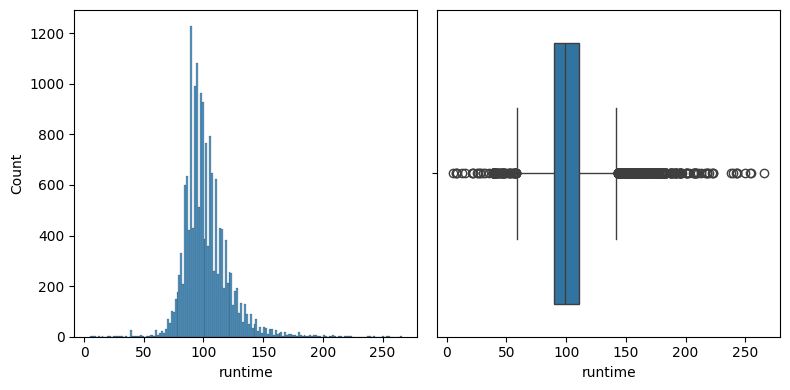

In [31]:
fig, axis = plt.subplots(1, 2, figsize=(8, 4))

# runtime
sns.histplot(ax = axis[0], data = movies, x = "runtime")
sns.boxplot(ax = axis[1], data = movies, x = "runtime")

plt.tight_layout()
plt.show()

La duración de las películas tiene un comportamiento que se asemeja a una distribución normal, con cierta asimetría.

El diagrama de cajas muestra que la mediana de los datos está sobre los 100min, con valores atípicos en ambos bigotes del boxplot.

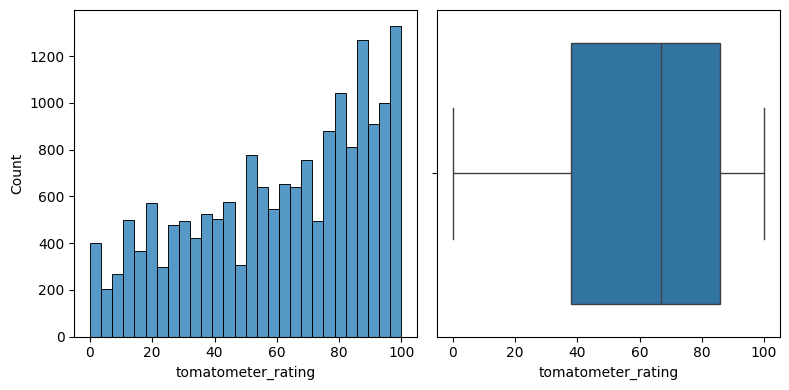

In [32]:
fig, axis = plt.subplots(1, 2, figsize=(8, 4))

# tomatometer_rating
sns.histplot(ax = axis[0], data = movies, x = "tomatometer_rating")
sns.boxplot(ax = axis[1], data = movies, x = "tomatometer_rating")

plt.tight_layout()
plt.show()

El histograma muestra que son más las películas que tienen reseñas altas, con respecto a las que no tienen reseñas o tienen reseñas bajas.

El diagrama de cajas muestra que la mediana de los datos es un poco inferior a 70, con mayor dispersión a la izquierda de la mediana.

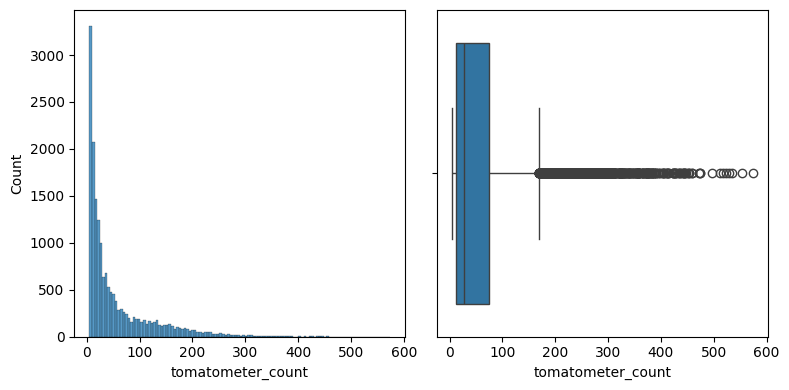

In [33]:
fig, axis = plt.subplots(1, 2, figsize=(8, 4))

# tomatometer_count
sns.histplot(ax = axis[0], data = movies, x = "tomatometer_count")
sns.boxplot(ax = axis[1], data = movies, x = "tomatometer_count")

plt.tight_layout()
plt.show()

Entendiendo que ***Rotten Tomatoes*** es una base de datos de reseñas de películas, es de esperar que algunas películas tengan menos reseñas que otras y que incluso haya películas sin reseñas.

El histograma de los datos refleja este comportamiento.

Adicionalmente, el diagrama de cajas nos muestra que la media de los datos está cerca de veinte y que sobre la mediana, hay una gran dispersión de datos con muchos valores atípicos.

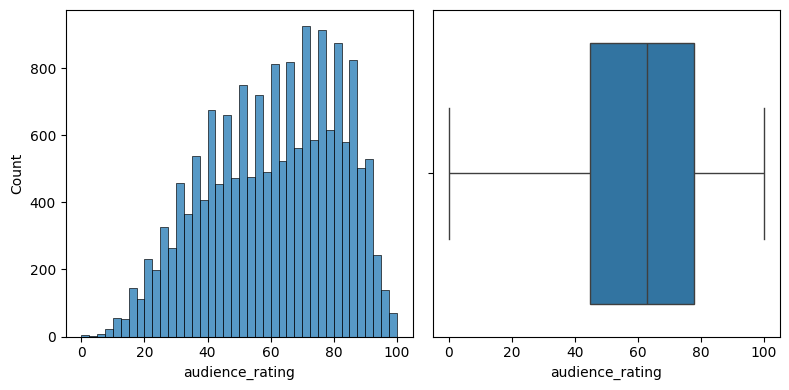

In [34]:
fig, axis = plt.subplots(1, 2, figsize=(8, 4))

# audience_rating
sns.histplot(ax = axis[0], data = movies, x = "audience_rating")
sns.boxplot(ax = axis[1], data = movies, x = "audience_rating")

plt.tight_layout()
plt.show()

El histograma muestra que los datos tienen una distribución cuasinormal con algo de asimetría.

El boxplot muestra que a la izquierda de la mediana los datos están más dispersos.

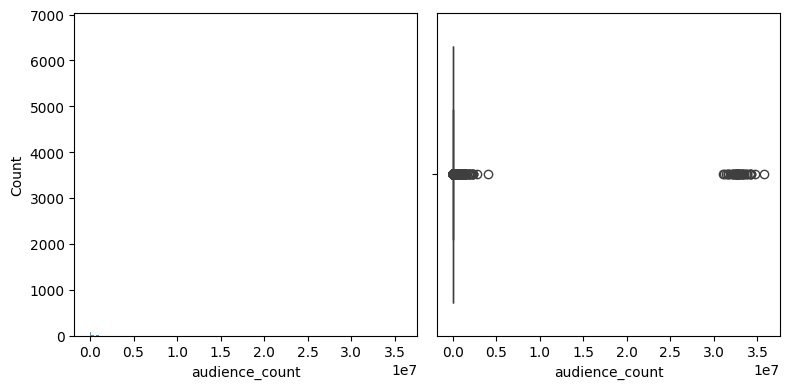

In [35]:
fig, axis = plt.subplots(1, 2, figsize=(8, 4))

# audience_count
sns.histplot(ax = axis[0], data = movies, x = "audience_count")
sns.boxplot(ax = axis[1], data = movies, x = "audience_count")

plt.tight_layout()
plt.show()

Para la variable audience_count, los datos están tan dispersos que el gráfico queda aplastado en el eje X. Por ello, aplicaremos una transformación logarítmica que nos permita visualizarlos mejor.

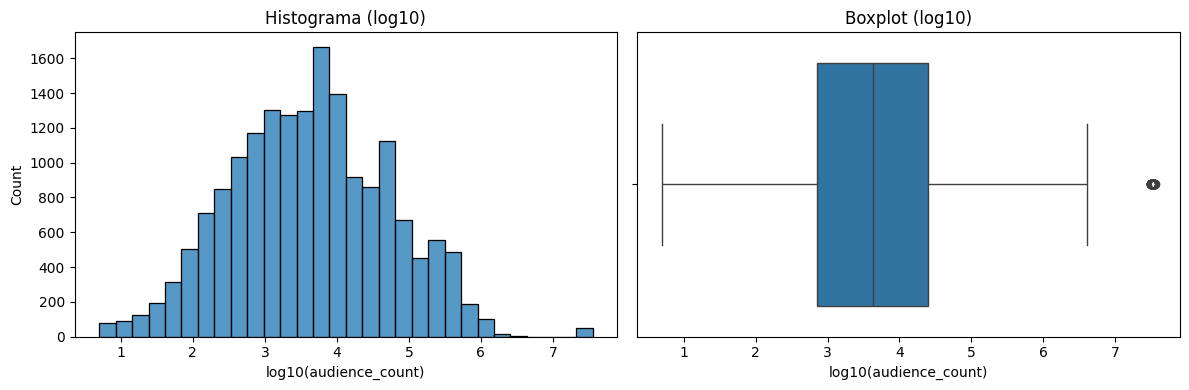

In [68]:
data_log = np.log10(movies["audience_count"][movies["audience_count"] > 0])

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data_log, ax=axes[0], bins=30, kde=False)
axes[0].set_title("Histograma (log10)")
axes[0].set_xlabel("log10(audience_count)")

sns.boxplot(x=data_log, ax=axes[1])
axes[1].set_title("Boxplot (log10)")
axes[1].set_xlabel("log10(audience_count)")

plt.tight_layout()
plt.show()

El histograma muestra que los datos tienen una distribución cuasinormal con una ligera asimetría.

El boxplot muestra que a la derecha de la mediana los datos están más dispersos, con presencia de datos atípicos.

Los siguientes tres gráficos van a tener un comportamiento similar: al tratarse de cantidad de críticas, se debe tomar en cuenta que habrá películas con muchas críticas y películas sin críticas.

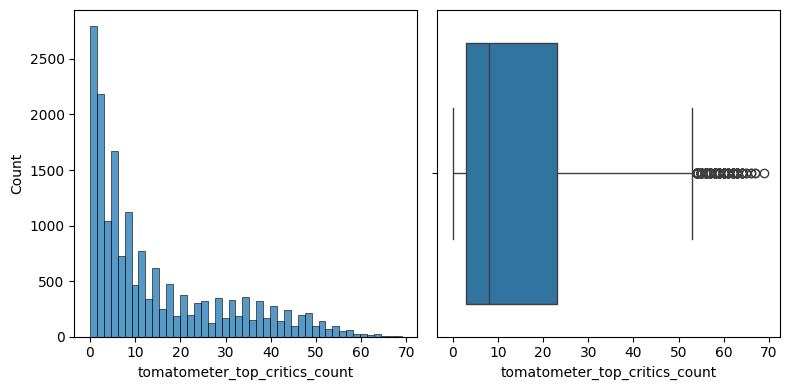

In [36]:
fig, axis = plt.subplots(1, 2, figsize=(8, 4))

# tomatometer_top_critics_count
sns.histplot(ax = axis[0], data = movies, x = "tomatometer_top_critics_count")
sns.boxplot(ax = axis[1], data = movies, x = "tomatometer_top_critics_count")

plt.tight_layout()
plt.show()

El histograma muestra que son más las películas que no tienen reseñas de críticos top, que las que sí tienen.

El diagrama de cajas nos muestra que la media de los datos está cerca de diez y que hay una gran dispersión a la derecha de la mediana, con presencia de datos atípicos.

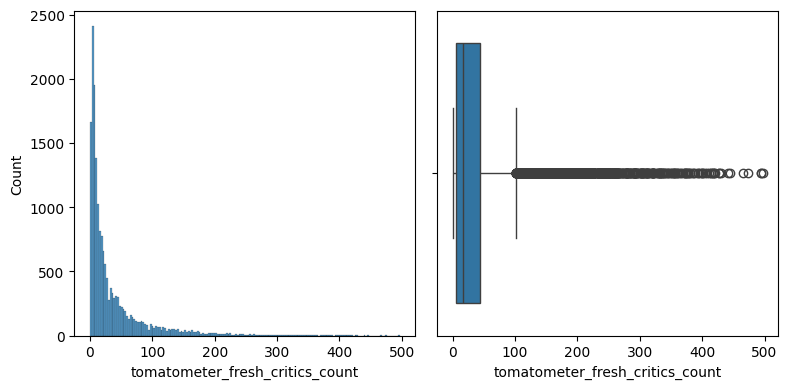

In [69]:
fig, axis = plt.subplots(1, 2, figsize=(8, 4))

# tomatometer_fresh_critics_count
sns.histplot(ax = axis[0], data = movies, x = "tomatometer_fresh_critics_count")
sns.boxplot(ax = axis[1], data = movies, x = "tomatometer_fresh_critics_count")

plt.tight_layout()
plt.show()

El histograma muestra que son más las películas que no tienen críticas positivas, que las que sí tienen.

El diagrama de cajas nos muestra que hay una gran dispersión a la derecha de la mediana, con presencia de datos atípicos.

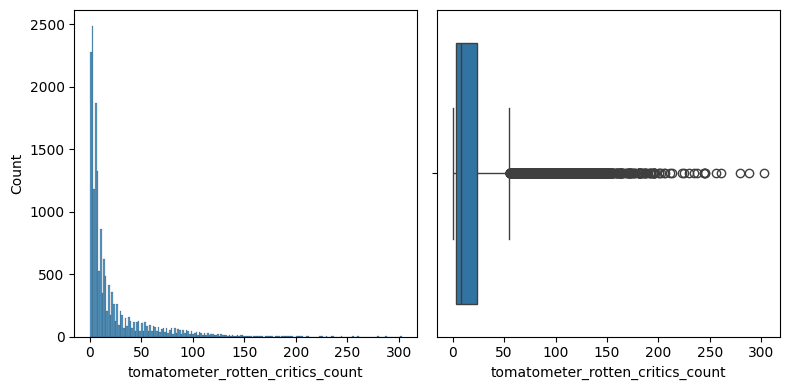

In [38]:
fig, axis = plt.subplots(1, 2, figsize=(8, 4))

# tomatometer_rotten_critics_count
sns.histplot(ax = axis[0], data = movies, x = "tomatometer_rotten_critics_count")
sns.boxplot(ax = axis[1], data = movies, x = "tomatometer_rotten_critics_count")

plt.tight_layout()
plt.show()

El histograma muestra que son más las películas que no tienen críticas negativas, que las que sí tienen.

El diagrama de cajas nos muestra que hay una gran dispersión a la derecha de la mediana, con presencia de datos atípicos.

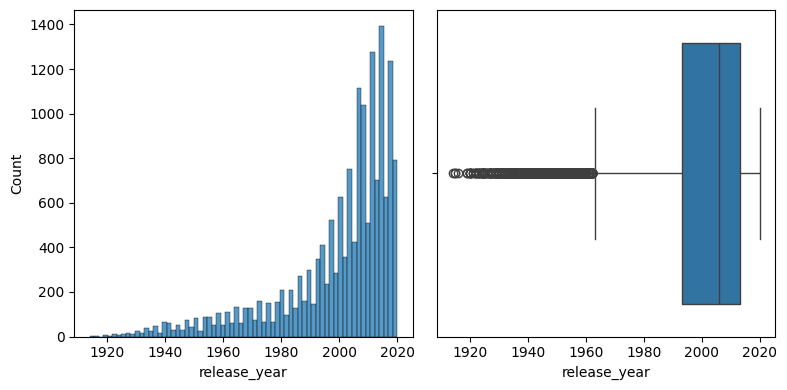

In [39]:
fig, axis = plt.subplots(1, 2, figsize=(8, 4))

# year
sns.histplot(ax = axis[0], data = movies[movies["release_year"] > 0], x = "release_year")
sns.boxplot(ax = axis[1], data = movies[movies["release_year"] > 0], x = "release_year")

plt.tight_layout()
plt.show()

El histograma de los datos sugiere que a medida que pasan los años, se lanzan más películas.

El diagrama de cajas muestra una gran dispersión a la izquierda de la mediana (que debe estar sobre 2006), con presencia de datos atípicos.

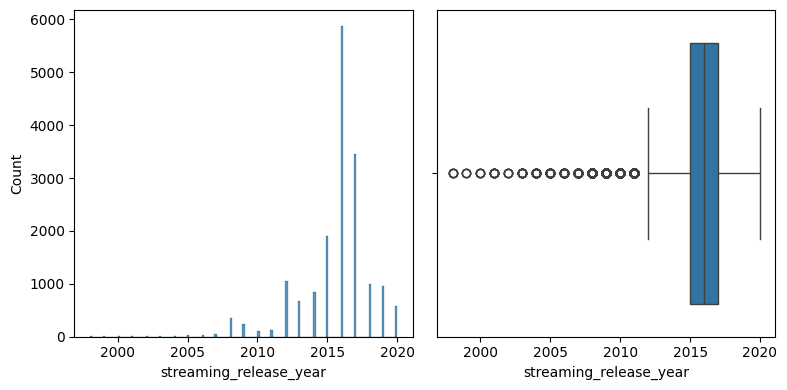

In [70]:
fig, axis = plt.subplots(1, 2, figsize=(8, 4))

# year
sns.histplot(ax = axis[0], data = movies[movies["streaming_release_year"] > 0], x = "streaming_release_year")
sns.boxplot(ax = axis[1], data = movies[movies["streaming_release_year"] > 0], x = "streaming_release_year")

plt.tight_layout()
plt.show()

El histograma de los datos muestra una distribución cuasinormal, con cierta asimetría. La moda de los datos está en 2017.

El histograma muestra una mayor dispersión a la izquierda de la mediana, con presencia de datos atípicos.

## 4.2 Variables Categóricas <a classs="anchor" id="categoricas"></a>

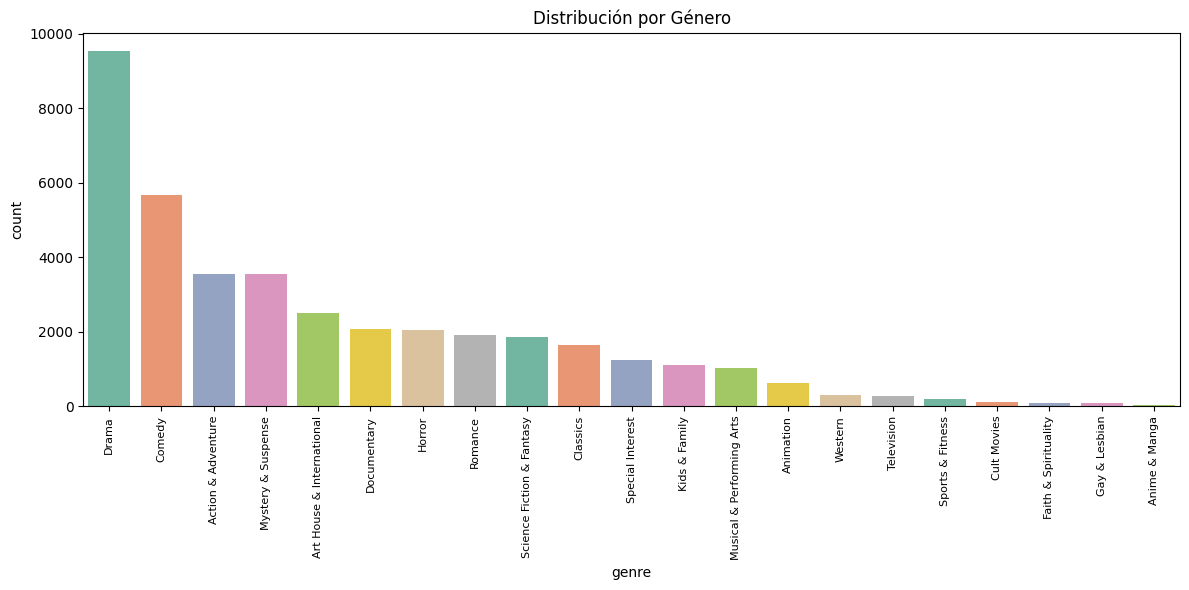

In [41]:
#Genres
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=movie_genre,
    x="genre",
    order=movie_genre["genre"].value_counts().index,
    palette="Set2"
)

plt.title("Distribución por Género")
ax.tick_params(axis='x', rotation=90, labelsize=8)
plt.tight_layout()
plt.show()

El dataset de ***Rotten Tomatoes*** contiene 20 géneros de cinematográficos. El género más popular es Drama y el menos popular Anime & Manga.

Para los gráficos de directores, autores, actores y productoras, hay tanta variedad de datos que nos enfocaremos en el top 10 por película.

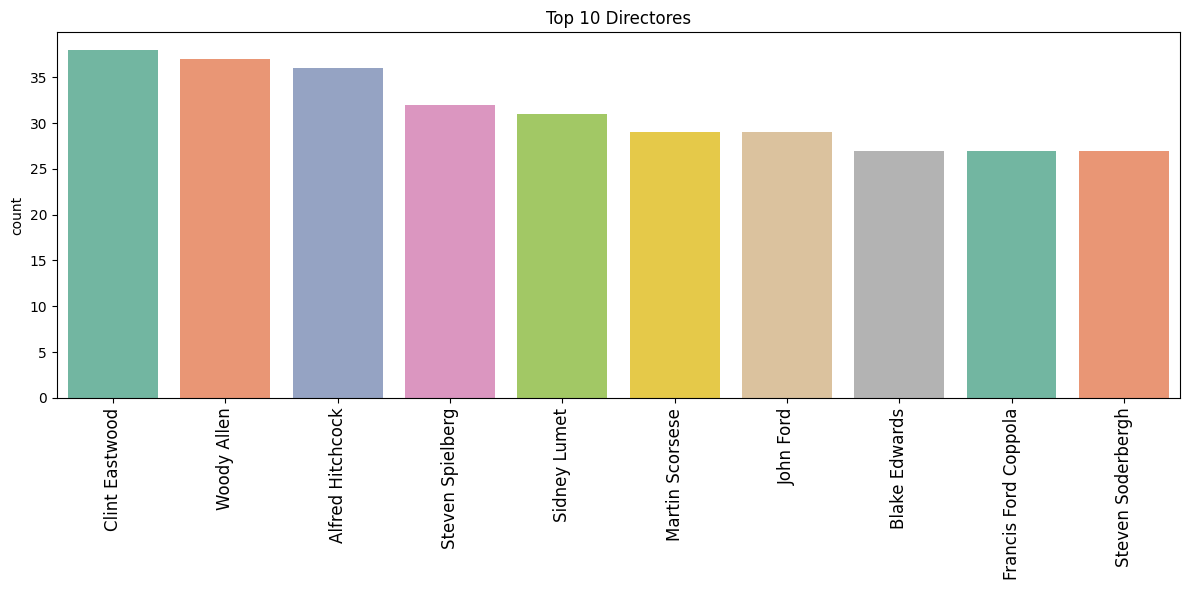

In [19]:
director_counts = movie_director['director'].value_counts()

top_directors = director_counts.nlargest(10).index

movie_director_top = movie_director[movie_director['director'].isin(top_directors)]

plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=movie_director_top,
    x="director",
    order=movie_director_top["director"].value_counts().index,
    palette="Set2"
)

plt.title("Top 10 Directores")
ax.tick_params(axis='x', rotation=90, labelsize=12)
ax.set_xlabel('')
plt.tight_layout()
plt.show()

El director más popular es Clint Eastwood, con más de 35 películas, seguido de cerca por Woody Allen y Alfred Hitchcock.

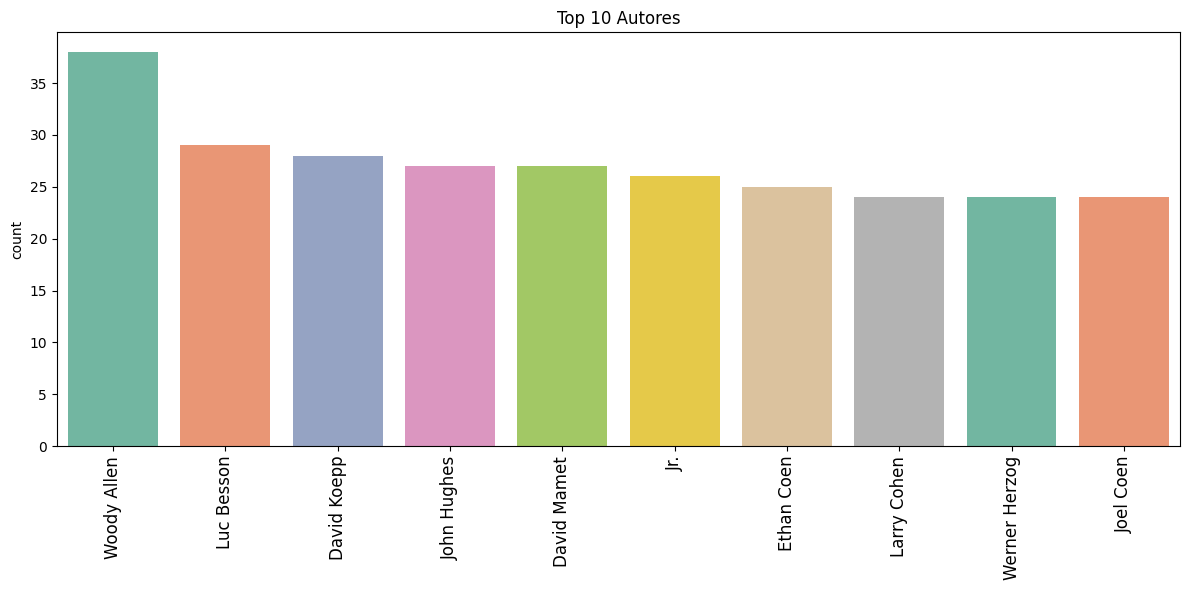

In [88]:
author_counts = movie_author['author'].value_counts()

top_authors = author_counts.nlargest(10).index

movie_author_top = movie_author[movie_author['author'].isin(top_authors)]

plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=movie_author_top,
    x="author",
    order=movie_author_top["author"].value_counts().index,
    palette="Set2"
)

plt.title("Top 10 Autores")
ax.tick_params(axis='x', rotation=90, labelsize=12)
ax.set_xlabel('')
plt.tight_layout()
plt.show()

El autor más popular es Woody Allen, con más de 35 películas. Le sigue Luc Besson y David Koepp.

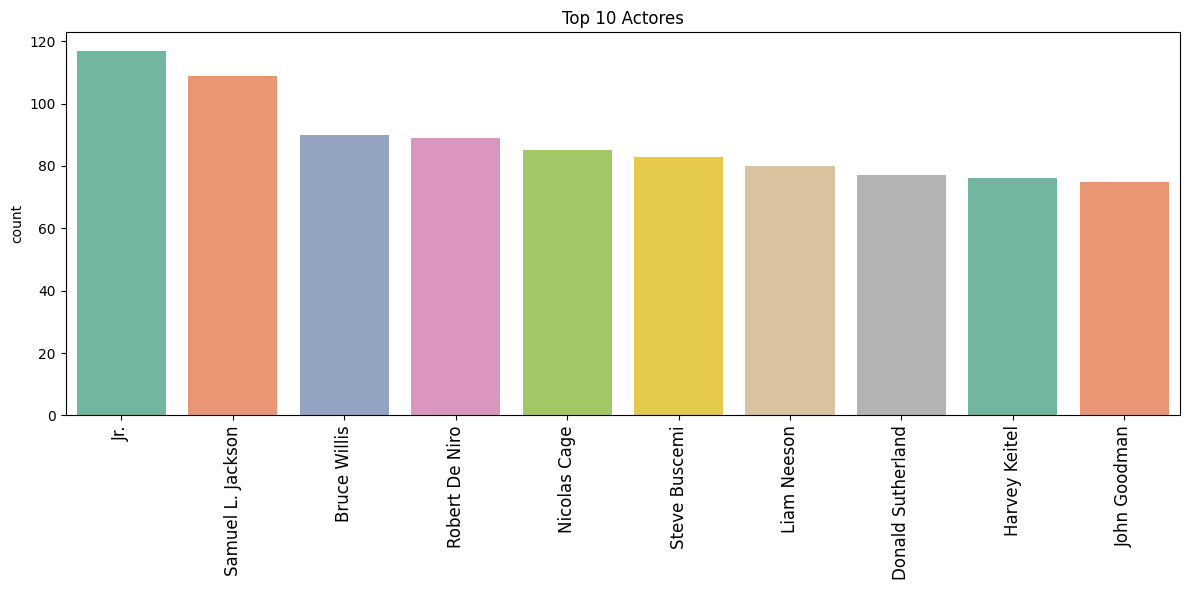

In [89]:
actors_counts = movie_actor['actor'].value_counts()

top_actors = actors_counts.nlargest(10).index

movie_actor_top = movie_actor[movie_actor['actor'].isin(top_actors)]

plt.figure(figsize=(12, 6))
ax = sns.countplot(
    data=movie_actor_top,
    x="actor",
    order=movie_actor_top["actor"].value_counts().index,
    palette="Set2"
)

plt.title("Top 10 Actores")
ax.tick_params(axis='x', rotation=90, labelsize=12)
ax.set_xlabel('')
plt.tight_layout()
plt.show()

El actor más popular es Jr., con cerca de 120 películas, seguido de Samuel L. Jackson y Bruce Willis.

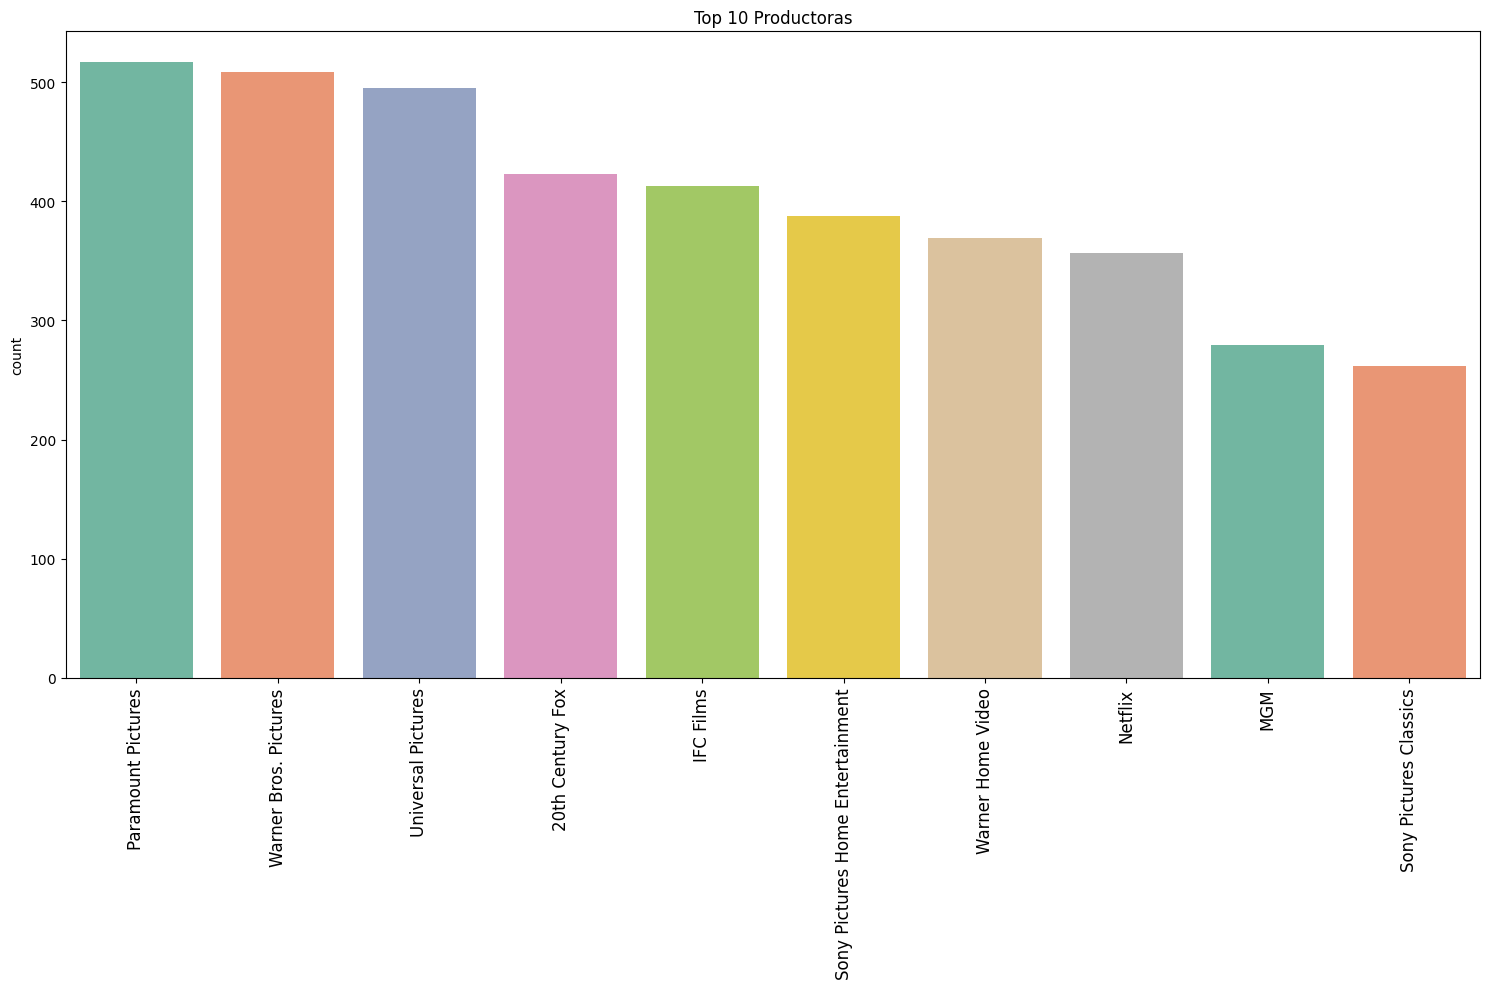

In [85]:
pc_counts = movies['production_company'].value_counts()
top_pc = pc_counts.nlargest(10).index

pc_top = movies[movies['production_company'].isin(top_pc)]

plt.figure(figsize=(15, 10))
ax = sns.countplot(
    data=pc_top,
    x="production_company",
    order=pc_counts.loc[top_pc].index,
    palette="Set2"
)

plt.title("Top 10 Productoras")
ax.tick_params(axis='x', rotation=90, labelsize=12)
ax.set_xlabel('')
plt.tight_layout()
plt.show()

La productora más popular es Paramount Pictures, con más de 500 películas, seguida de Warner Bros. Pictures y Universal Pictures.

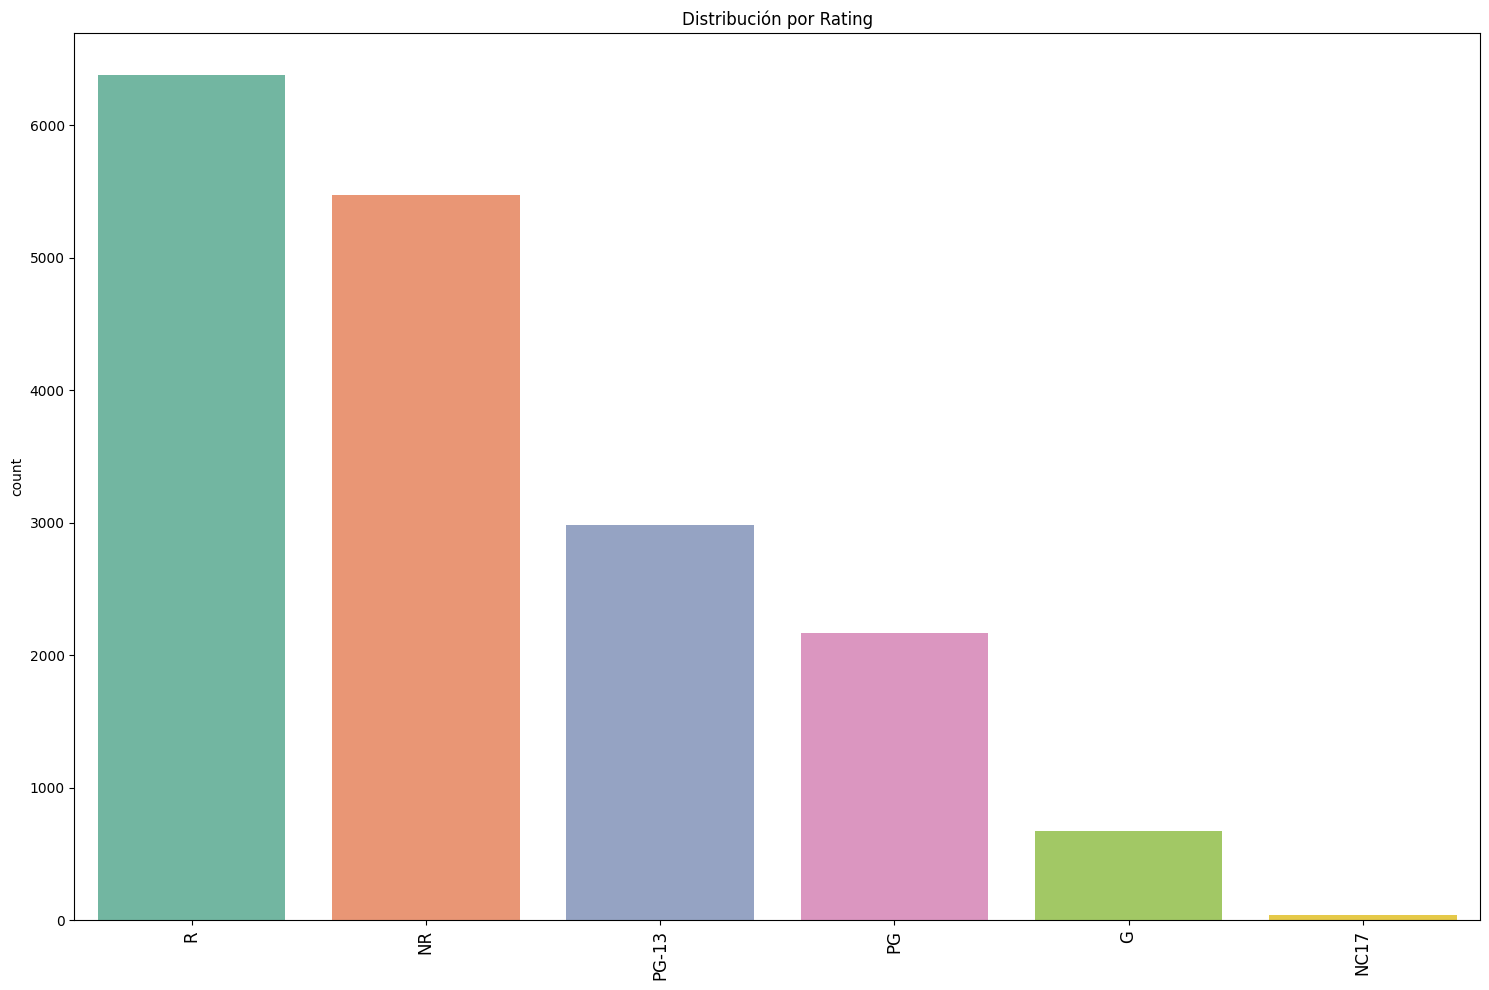

In [26]:
#Content Rating
plt.figure(figsize=(15, 10))
ax = sns.countplot(
    data=movies,
    x="content_rating",
    order=movies["content_rating"].value_counts().index,
    palette="Set2"
)

plt.title("Distribución por Rating")
ax.tick_params(axis='x', rotation=90, labelsize=12)
ax.set_xlabel('')
plt.tight_layout()
plt.show()

El dataset tiene 6 ratings de películas, siendo R el más popular.

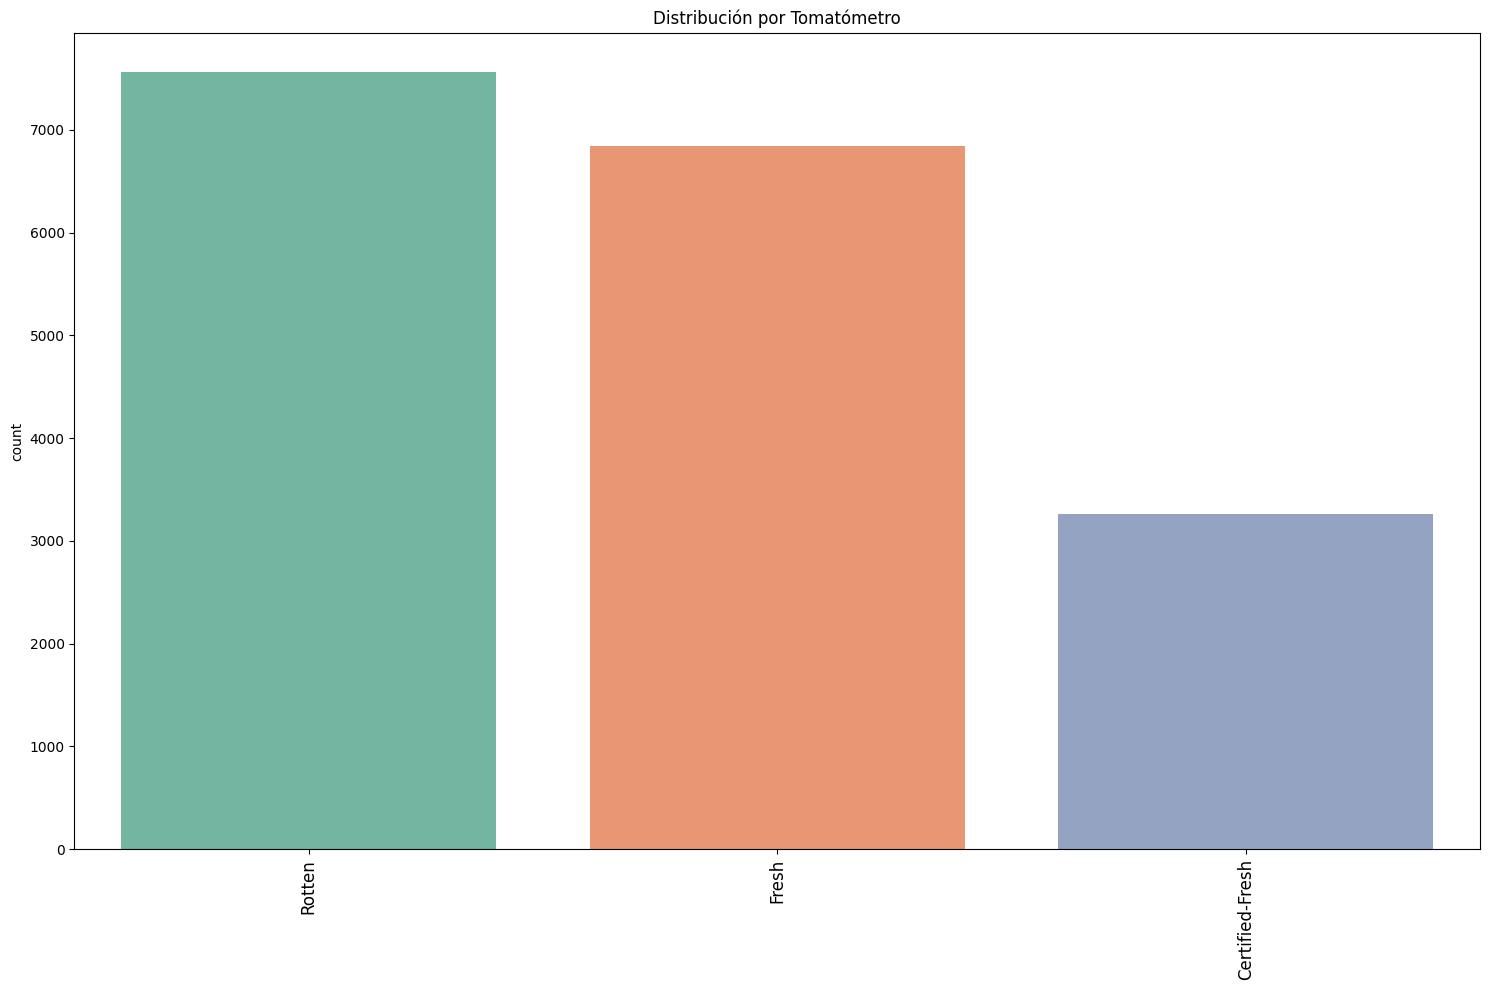

In [39]:
#tomatometer_status
plt.figure(figsize=(15, 10))
ax = sns.countplot(
    data=movies,
    x="tomatometer_status",
    order=movies["tomatometer_status"].value_counts().index,
    palette="Set2"
)

plt.title("Distribución por Tomatómetro")
ax.tick_params(axis='x', rotation=90, labelsize=12)
ax.set_xlabel('')
plt.tight_layout()
plt.show()

El dataset tiene 3 estatus de tomatómetro, siendo Rotten el más popular.

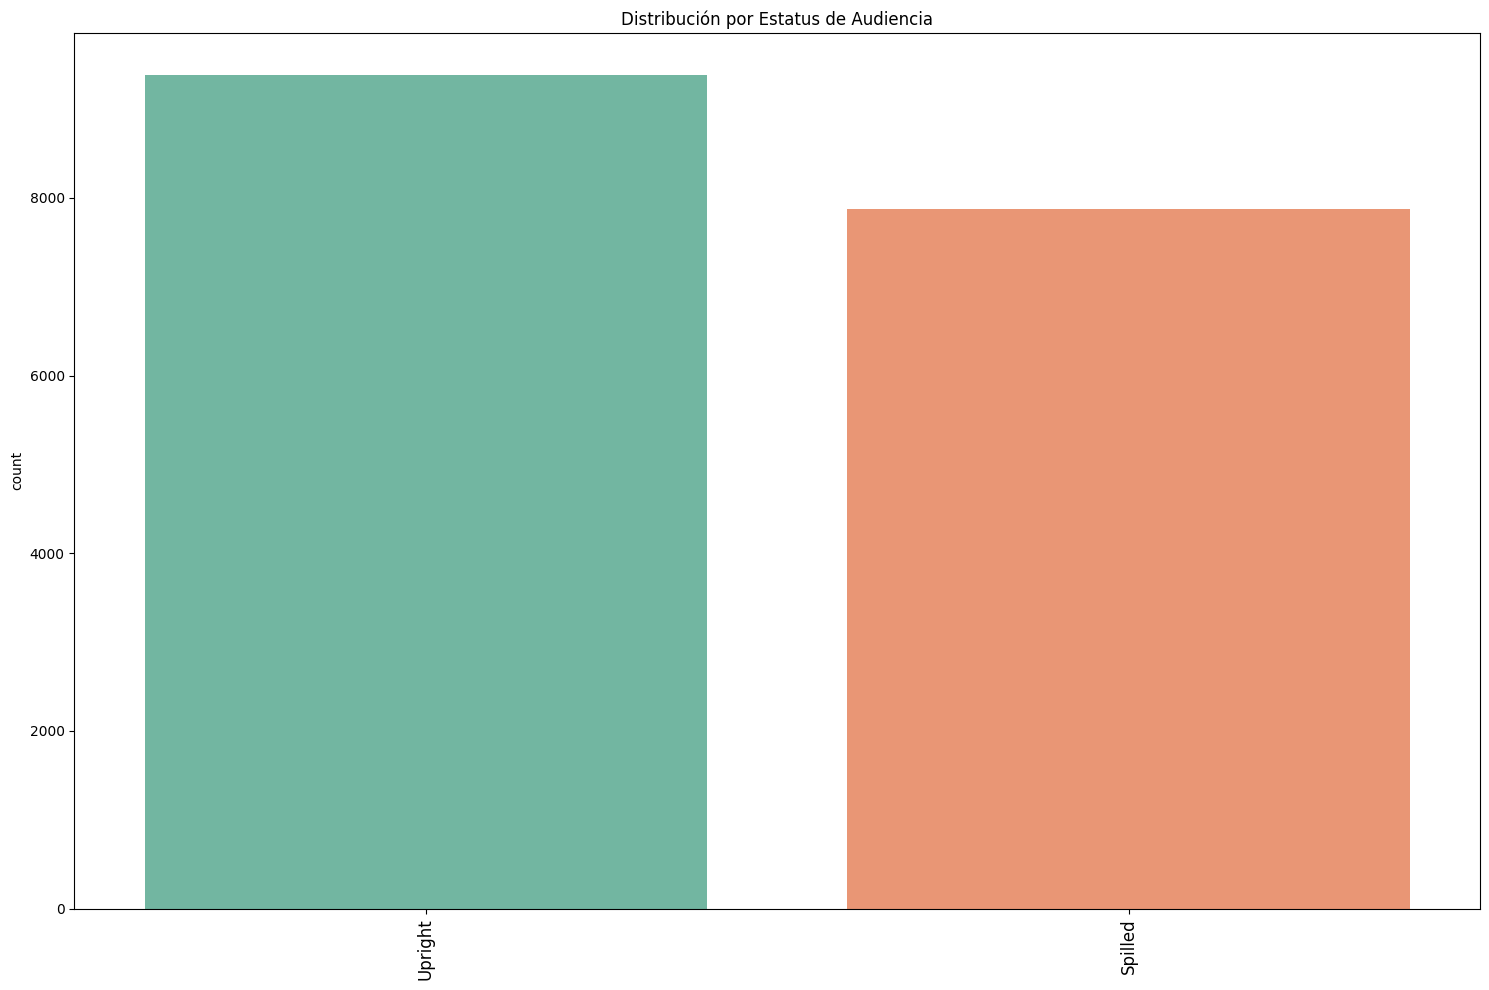

In [41]:
#audience_status
plt.figure(figsize=(15, 10))
ax = sns.countplot(
    data=movies,
    x="audience_status",
    order=movies["audience_status"].value_counts().index,
    palette="Set2"
)

plt.title("Distribución por Estatus de Audiencia")
ax.tick_params(axis='x', rotation=90, labelsize=12)
ax.set_xlabel('')
plt.tight_layout()
plt.show()

El dataset tiene 3 estatus de audiencia, siendo Upright el más popular.

Para el dataset de críticas, usaremos otro enfoque.

### 4.2.1. Dividir el Dataset en Categóricos y Numéricos <a classs="anchor" id="dividir"></a>

In [46]:
c_df_copy = critics.copy()
c_df_copy.dtypes.unique()

array([dtype('O'), dtype('bool')], dtype=object)

Todas las variables son categoricas.

### 4.2.2 Análisis de Variables Categóricas <a classs="anchor" id="analisiscategoricas"></a>

In [47]:
print(c_df_copy['rotten_tomatoes_link'].value_counts().head(10))
print(f"Total de productos únicos: {c_df_copy['rotten_tomatoes_link'].nunique()}")
print("------------------------------------------------------")
print(c_df_copy['publisher_name'].value_counts().head(10))
print(f"Total de editoriales únicos: {c_df_copy['publisher_name'].nunique()}")

rotten_tomatoes_link
m/joker_2019                         574
m/once_upon_a_time_in_hollywood      554
m/us_2019                            535
m/avengers_endgame                   528
m/captain_marvel                     523
m/a_star_is_born_2018                517
m/black_panther_2018                 512
m/star_wars_the_rise_of_skywalker    496
m/solo_a_star_wars_story             474
m/star_wars_the_last_jedi            473
Name: count, dtype: int64
Total de productos únicos: 17697
------------------------------------------------------
publisher_name
New York Times        11816
Variety               10404
Time Out               9035
Los Angeles Times      9017
Slant Magazine         8073
Washington Post        8058
Hollywood Reporter     8045
eFilmCritic.com        7984
Village Voice          7345
Chicago Sun-Times      7202
Name: count, dtype: int64
Total de editoriales únicos: 2229


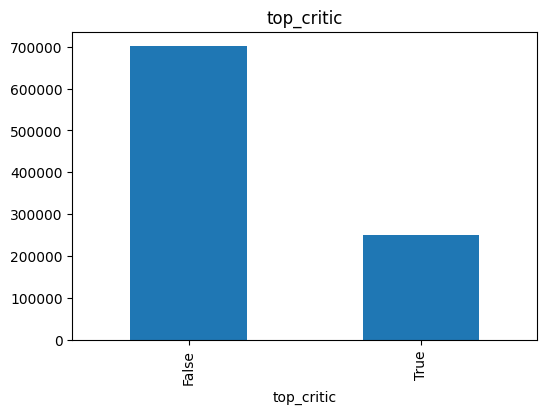

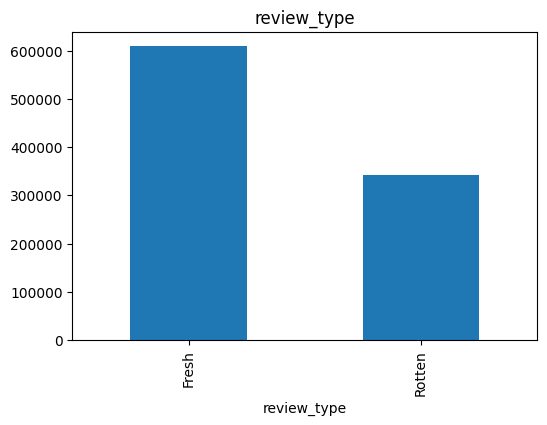

In [48]:
categorical_cols = [ 'top_critic', 'review_type']

for col in categorical_cols:
    c_df_copy[col].value_counts().plot(kind='bar', figsize=(6,4), title=col)
    plt.show()

- La mayoría de críticos no son destacados en una proporción casi dos veces más que los que sí lo son.
- Las reseñas positivas son casi el doble de las negativas.

Top 10 peliculas graficados: 10
Top 10 editoriales graficados: 10


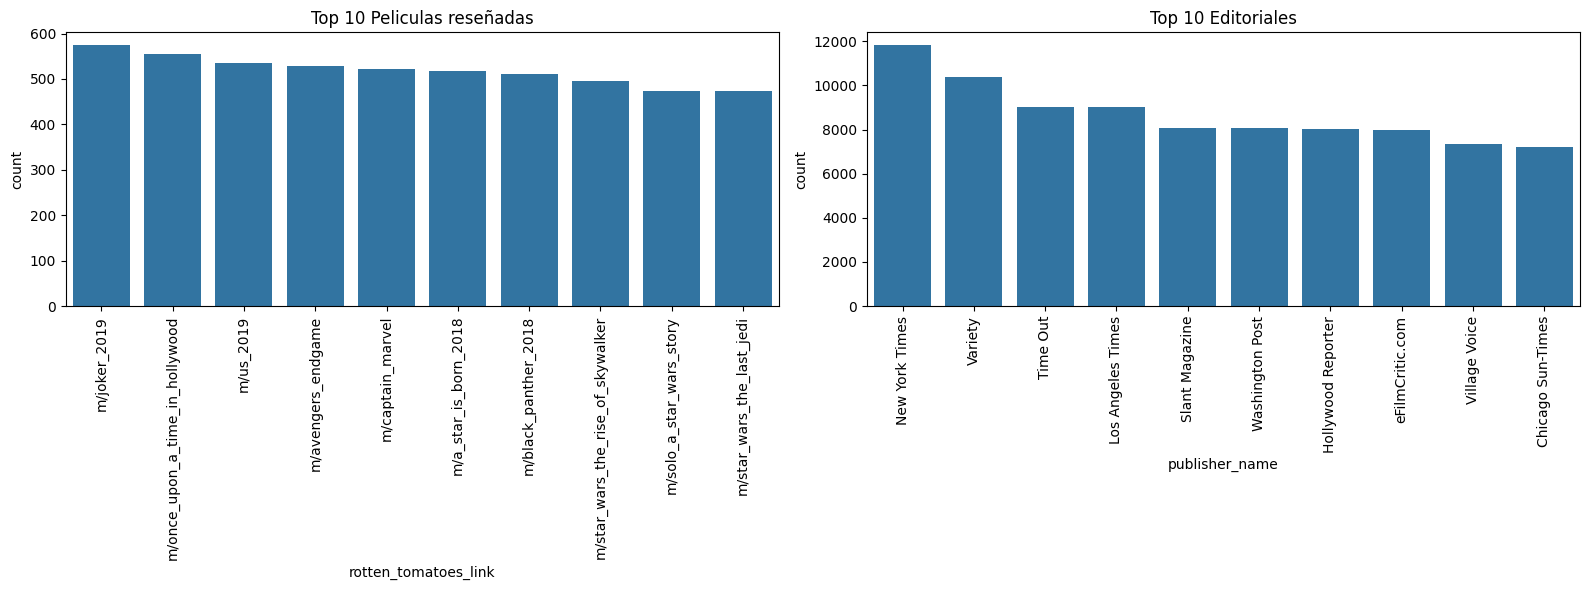

In [49]:
top_n_peliculas = 10
top_n_editorial = 10

fig, axis = plt.subplots(1, 2, figsize=(16, 6))

# PRODUCTOS
top_products = c_df_copy['rotten_tomatoes_link'].value_counts().head(top_n_peliculas).index
sns.countplot(ax=axis[0], data=c_df_copy, x='rotten_tomatoes_link', order=top_products)
axis[0].set_title("Top 10 Peliculas reseñadas")
axis[0].tick_params(axis='x', rotation=90)
print("Top 10 peliculas graficados:", len(top_products))

# USUARIOS
top_users = c_df_copy['publisher_name'].value_counts().head(top_n_editorial).index
sns.countplot(ax=axis[1], data=c_df_copy, x='publisher_name', order=top_users)
axis[1].set_title("Top 10 Editoriales")
axis[1].tick_params(axis='x', rotation=90)
print("Top 10 editoriales graficados:", len(top_users))

plt.tight_layout()
plt.show()

- El top de peliculas reseñadas esta rodeando las 500 reseñas.
- La editorial con mas reseñas de películas es New York Times con casi 12000, avanzando de manera descendente hasta Chicado Sun-Times con casi 8000.

# 5. Análisis Multivariante <a classs="anchor" id="multivariante"></a>

## 5.1 Análisis Numérico - Numérico <a classs="anchor" id="nn"></a>

Para el análisis numérico - numérico, sólo tomaremos en cuenta aquellas variables que tienen una correlación media, sea positiva o negativa.

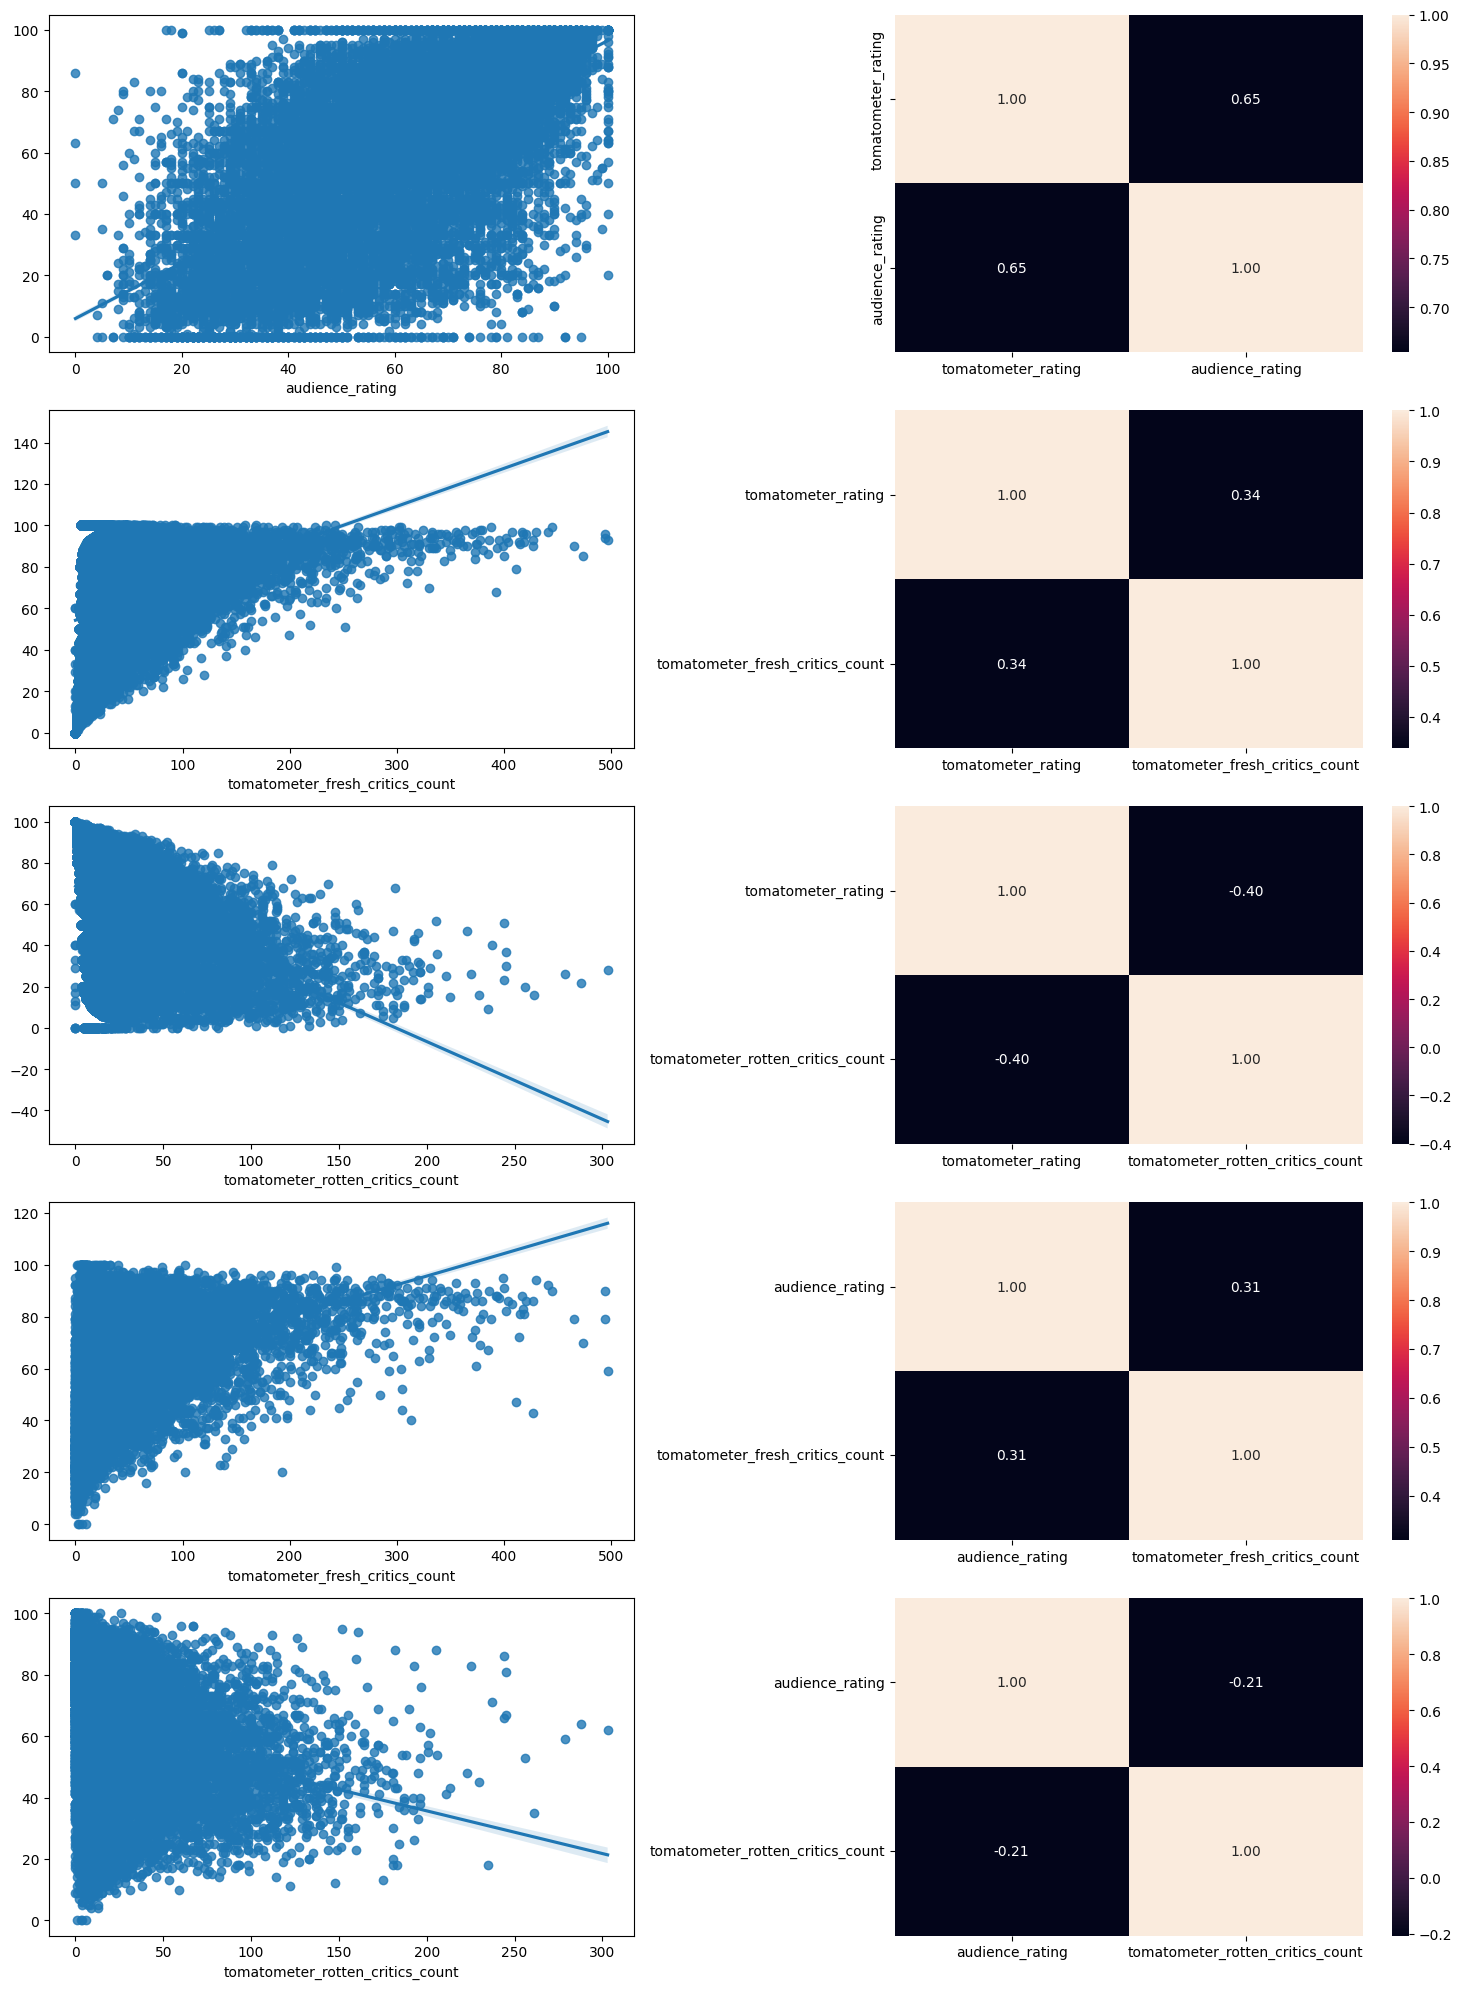

In [71]:
fig, axis = plt.subplots(5, 2, figsize = (15, 20))

# Crear un diagrama de dispersión múltiple

sns.regplot(ax = axis[0, 0], data = movies, x = "audience_rating", y = "tomatometer_rating").set(ylabel=None)
sns.heatmap(movies[["tomatometer_rating", "audience_rating"]].corr(), annot = True, fmt = ".2f", ax = axis[0, 1])

sns.regplot(ax = axis[1, 0], data = movies, x = "tomatometer_fresh_critics_count", y = "tomatometer_rating").set(ylabel=None)
sns.heatmap(movies[["tomatometer_rating", "tomatometer_fresh_critics_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = movies, x = "tomatometer_rotten_critics_count", y = "tomatometer_rating").set(ylabel=None)
sns.heatmap(movies[["tomatometer_rating", "tomatometer_rotten_critics_count"]].corr(), annot = True, fmt = ".2f", ax = axis[2, 1])

sns.regplot(ax = axis[3, 0], data = movies, x = "tomatometer_fresh_critics_count", y = "audience_rating").set(ylabel=None)
sns.heatmap(movies[["audience_rating", "tomatometer_fresh_critics_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

sns.regplot(ax = axis[4, 0], data = movies, x = "tomatometer_rotten_critics_count", y = "audience_rating").set(ylabel=None)
sns.heatmap(movies[["audience_rating", "tomatometer_rotten_critics_count"]].corr(), annot = True, fmt = ".2f", ax = axis[4, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- Vemos los gráficos presentan algo de heterocedasticidad. Esto ocurre debido a que la dispersión no es constante.

### 5.2 Análisis Categórico - Categórico <a classs="anchor" id="cc"></a>

In [51]:
def cat_cat(df, cat1, cat2, top_n_cat1=None, top_n_cat2=None):
    
    if top_n_cat1:
        top_values1 = df[cat1].value_counts().nlargest(top_n_cat1).index
        df = df[df[cat1].isin(top_values1)]
    if top_n_cat2:
        top_values2 = df[cat2].value_counts().nlargest(top_n_cat2).index
        df = df[df[cat2].isin(top_values2)]
    
    ct = pd.crosstab(df[cat1], df[cat2])
    
    ct_prop = ct.div(ct.sum(axis=1).replace(0,1), axis=0)
    
    ct_prop.plot(kind='bar', stacked=True, figsize=(12,6))
    plt.xlabel(cat1)
    plt.ylabel('Proporción')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title=cat2, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [52]:
movies_exploded_dir = movies.explode('directors')

movies_exploded_dir = movies_exploded_dir[movies_exploded_dir['directors'] != '']
movies_exploded_dir = movies_exploded_dir.dropna(subset=['directors'])

top10_directors = (
    movies_exploded_dir['directors']
    .value_counts()
    .head(10)
    .index
)
movies_top_directors = movies_exploded_dir[movies_exploded_dir['directors'].isin(top10_directors)]

In [53]:
movies_exploded_aut = movies.explode('authors')

movies_exploded_aut = movies_exploded_aut[movies_exploded_aut['authors'] != '']
movies_exploded_aut = movies_exploded_aut.dropna(subset=['authors'])

top10_authors = (
    movies_exploded_aut['authors']
    .value_counts()
    .head(10)
    .index
)
movies_top_authors = movies_exploded_aut[movies_exploded_aut['authors'].isin(top10_authors)]

In [54]:
movies_exploded_act = movies.explode('actors')

movies_exploded_act = movies_exploded_act[movies_exploded_act['actors'] != '']
movies_exploded_act = movies_exploded_act.dropna(subset=['actors'])

top10_actors = (
    movies_exploded_act['actors']
    .value_counts()
    .head(10)
    .index
)
movies_top_actors = movies_exploded_act[movies_exploded_act['actors'].isin(top10_actors)]

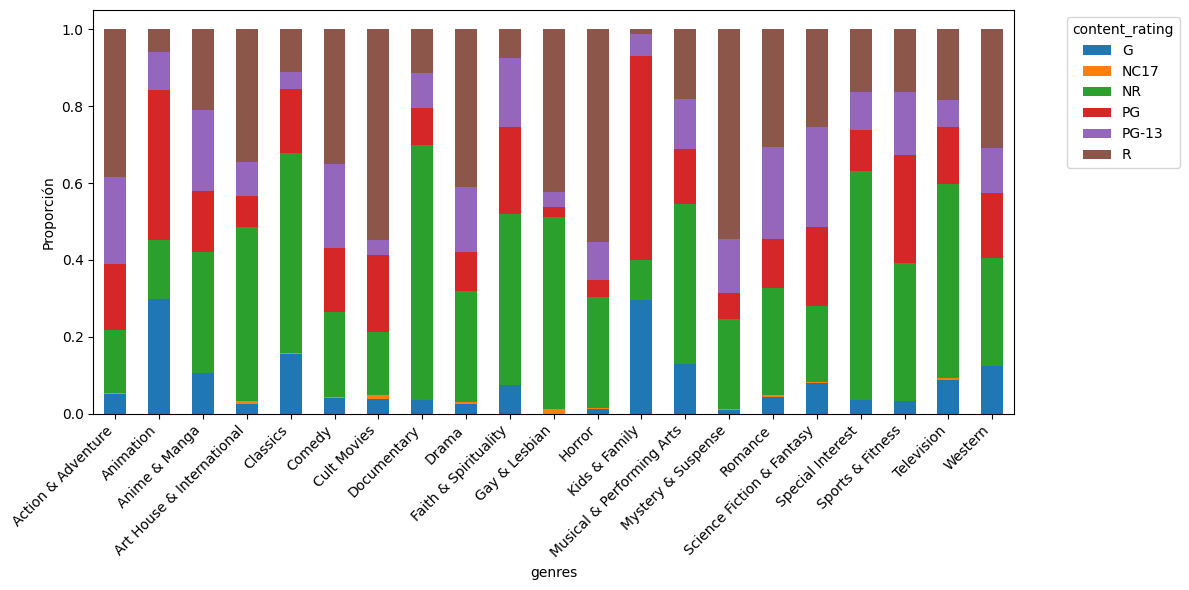

In [55]:
movies_exploded_genres = movies.explode('genres')

cat_cat(
    df=movies_exploded_genres,
    cat1='genres',        
    cat2='content_rating',
    top_n_cat1=None,      
    top_n_cat2=None       
)

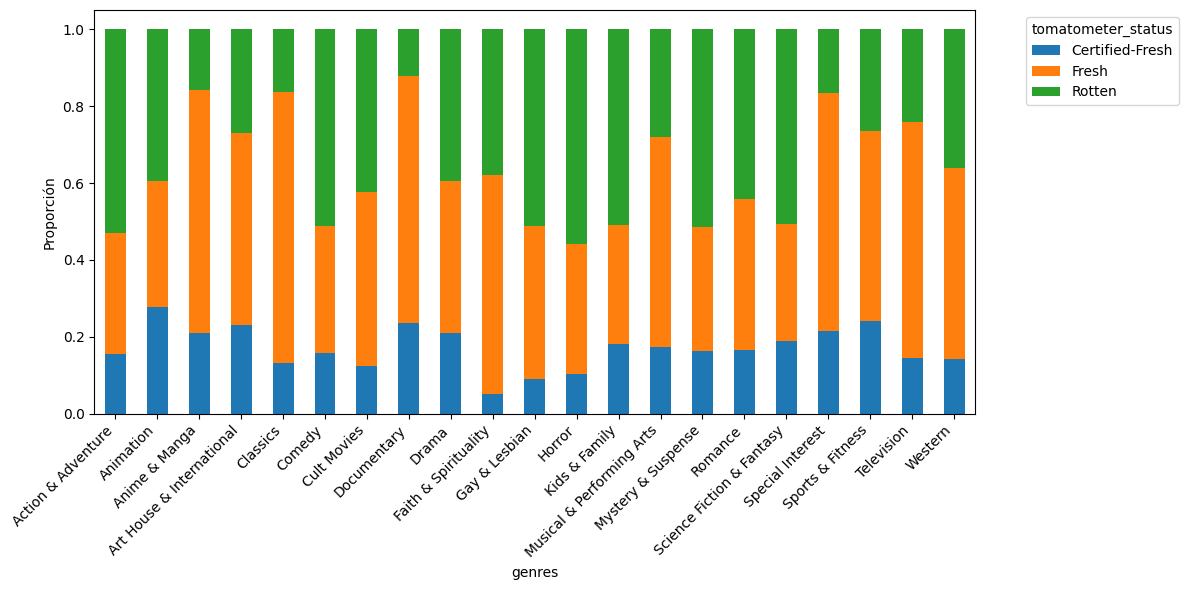

In [56]:
cat_cat(
    df=movies_exploded_genres,
    cat1='genres',        
    cat2='tomatometer_status',
    top_n_cat1=None,      
    top_n_cat2=None       
)

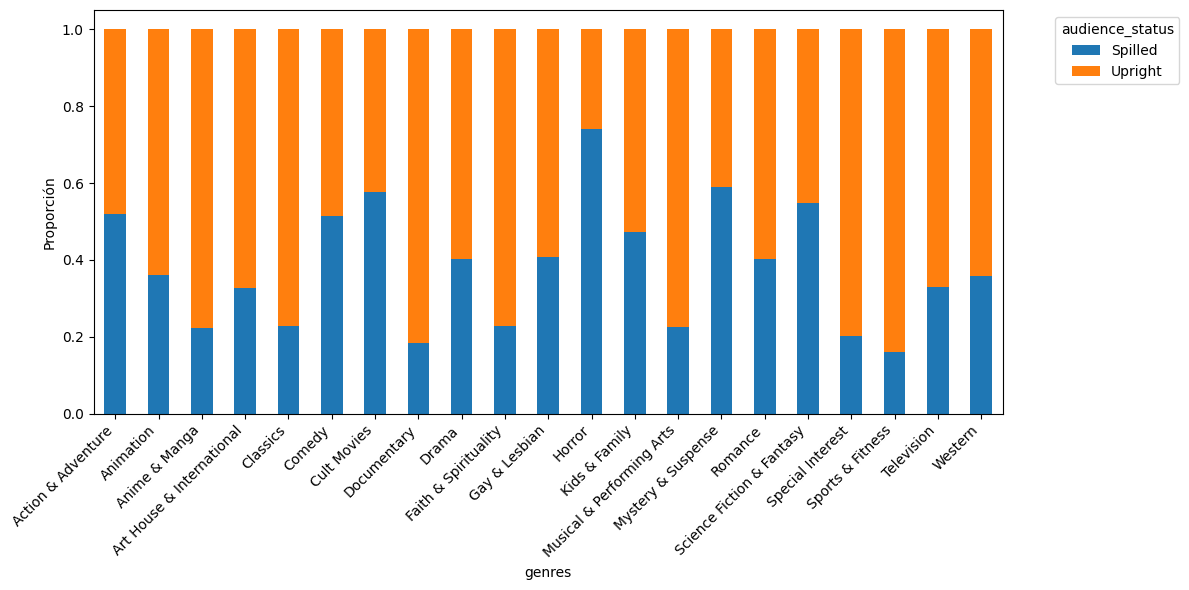

In [57]:
cat_cat(
    df=movies_exploded_genres,
    cat1='genres',        
    cat2='audience_status',
    top_n_cat1=None,      
    top_n_cat2=None       
)

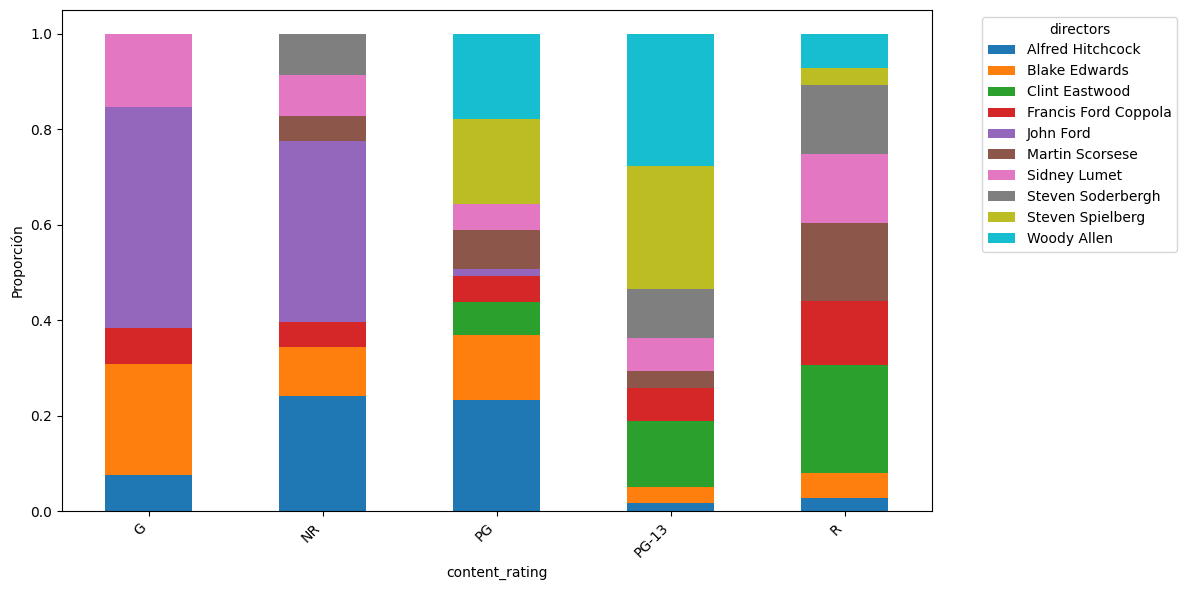

In [58]:
cat_cat(
    df=movies_top_directors,
    cat1='content_rating',        
    cat2='directors',
    top_n_cat1=None,      
    top_n_cat2=None       
)


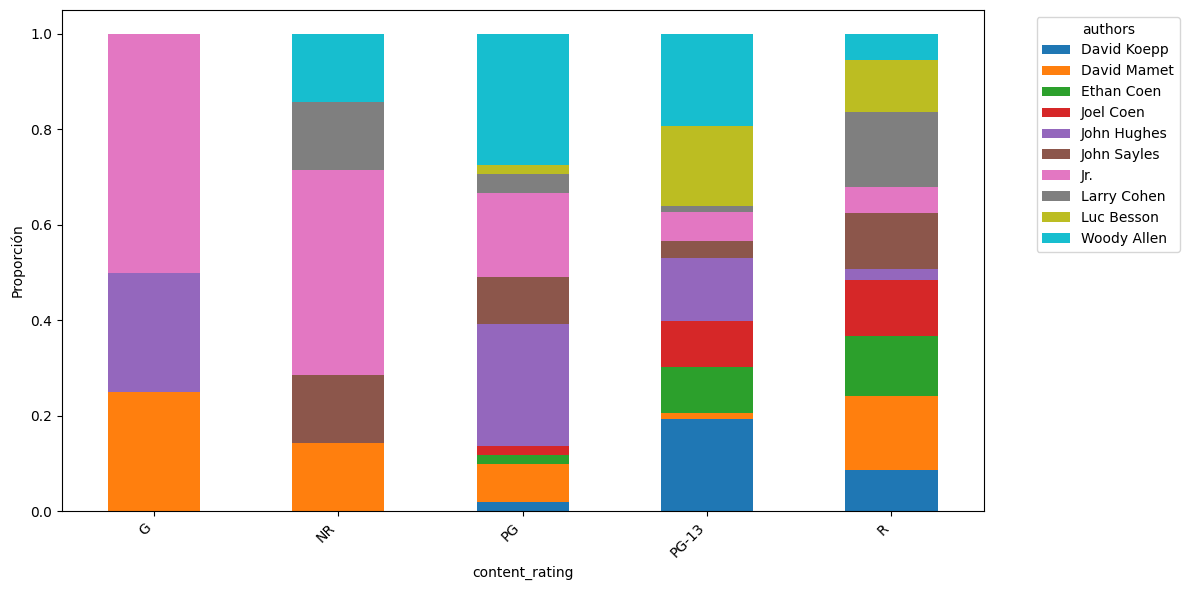

In [59]:
cat_cat(
    df=movies_top_authors,
    cat1='content_rating',        
    cat2='authors',
    top_n_cat1=None,      
    top_n_cat2=None       
)

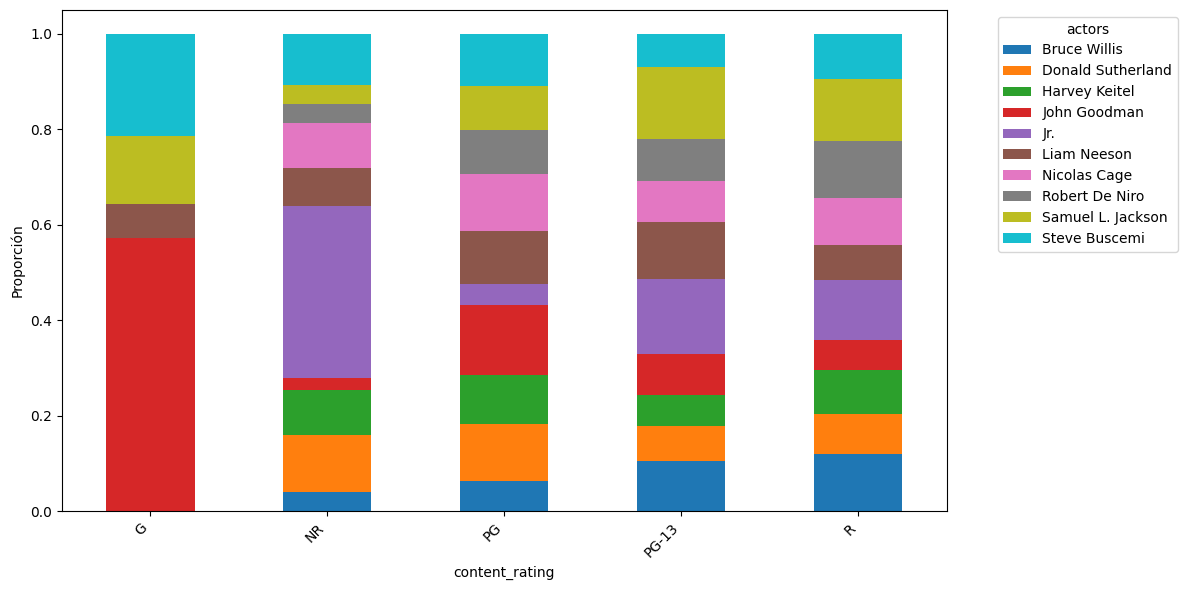

In [60]:
cat_cat(
    df=movies_top_actors,
    cat1='content_rating',        
    cat2='actors',
    top_n_cat1=None,      
    top_n_cat2=None       
)

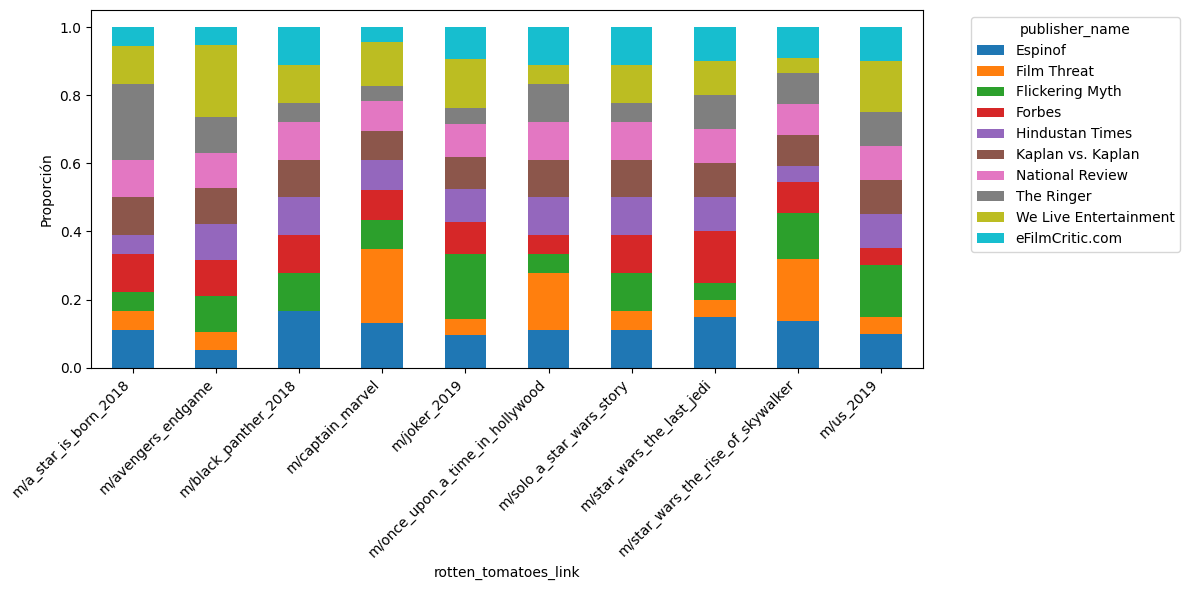

In [61]:
cat_cat(c_df_copy, 'rotten_tomatoes_link', 'publisher_name', top_n_cat1=top_n_peliculas, top_n_cat2=top_n_editorial)

Parece que eFilmCritic.com es quien más reseñas hace a las peliculas con más reseñas del top.

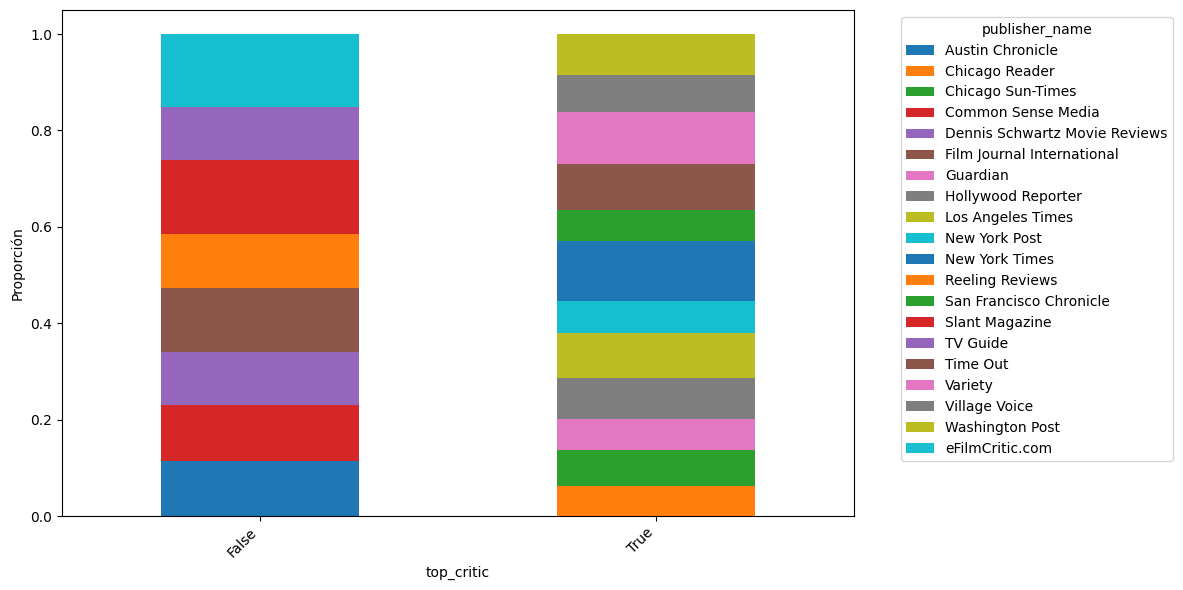

In [62]:
cat_cat(c_df_copy, 'top_critic', 'publisher_name', top_n_cat2=20)

Se ve que la mayoría de las editoriales con mas reseñas tienen críticos cuya opinión es validada, es importante teniendo en cuenta que hay más con la categoría false que con true.

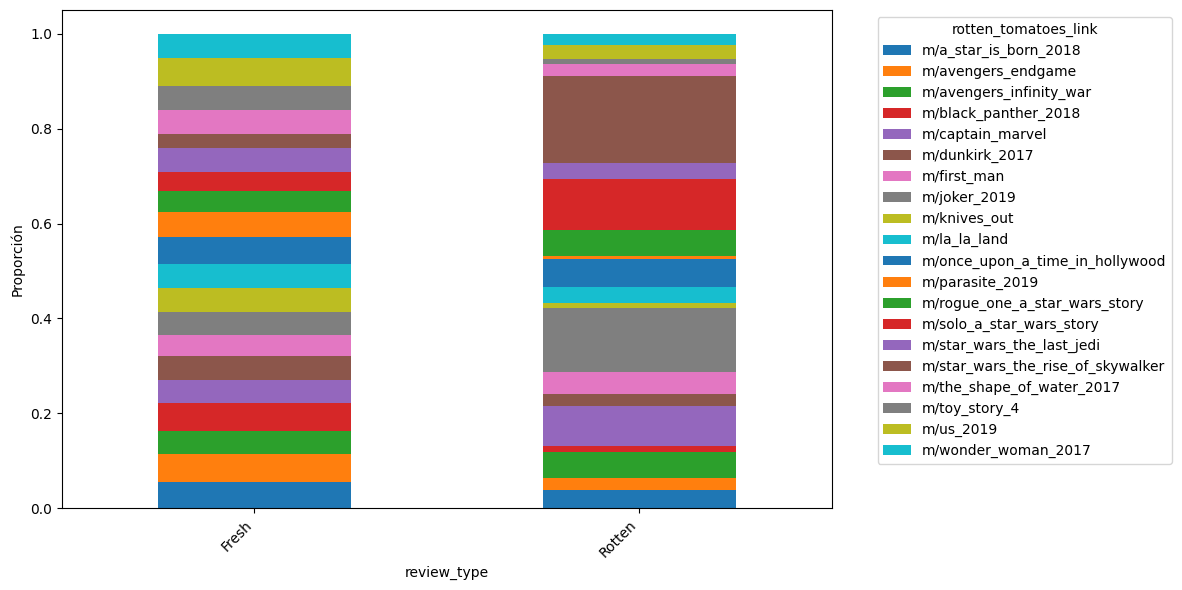

In [63]:
cat_cat(c_df_copy, 'review_type', 'rotten_tomatoes_link', top_n_cat2=20)

Las buenas reseñas estan distribuidas mas equitativamente entre las películas mientras que las malas se acumulan, esto sugiere que se le da importancia a que hay películas con más reseñas malas que buenas.

## 5.3 Análisis Numérico - Categórico <a classs="anchor" id="nc"></a>

### 5.3.1 Matriz de Correlación Múltiple <a classs="anchor" id="correlacion"></a>

Para continuar con el análisis de las variables categóricas y poder hacer un gráfico de correlaciones, debemos transformar estas variables en variables numéricas.

In [72]:
movies_n = movies.copy()

In [74]:
movies_n["content_rating_n"] = pd.factorize(movies_n["content_rating"])[0]
movies_n["production_company_n"] = pd.factorize(movies_n["production_company"])[0]
movies_n["tomatometer_status_n"] = pd.factorize(movies_n["tomatometer_status"])[0]
movies_n["audience_status_n"] = pd.factorize(movies_n["audience_status"])[0]

In [75]:
cols = [
    "content_rating_n",
    "release_year",
    "streaming_release_year",
    "runtime",
    "production_company_n",
    "tomatometer_status_n",
    "tomatometer_rating",
    "tomatometer_count",
    "audience_status_n",
    "audience_rating",
    "audience_count",
    "tomatometer_top_critics_count",
    "tomatometer_fresh_critics_count",
    "tomatometer_rotten_critics_count"
]

movies_corr = movies_n[cols]

movies_corr = movies_corr.fillna(0)


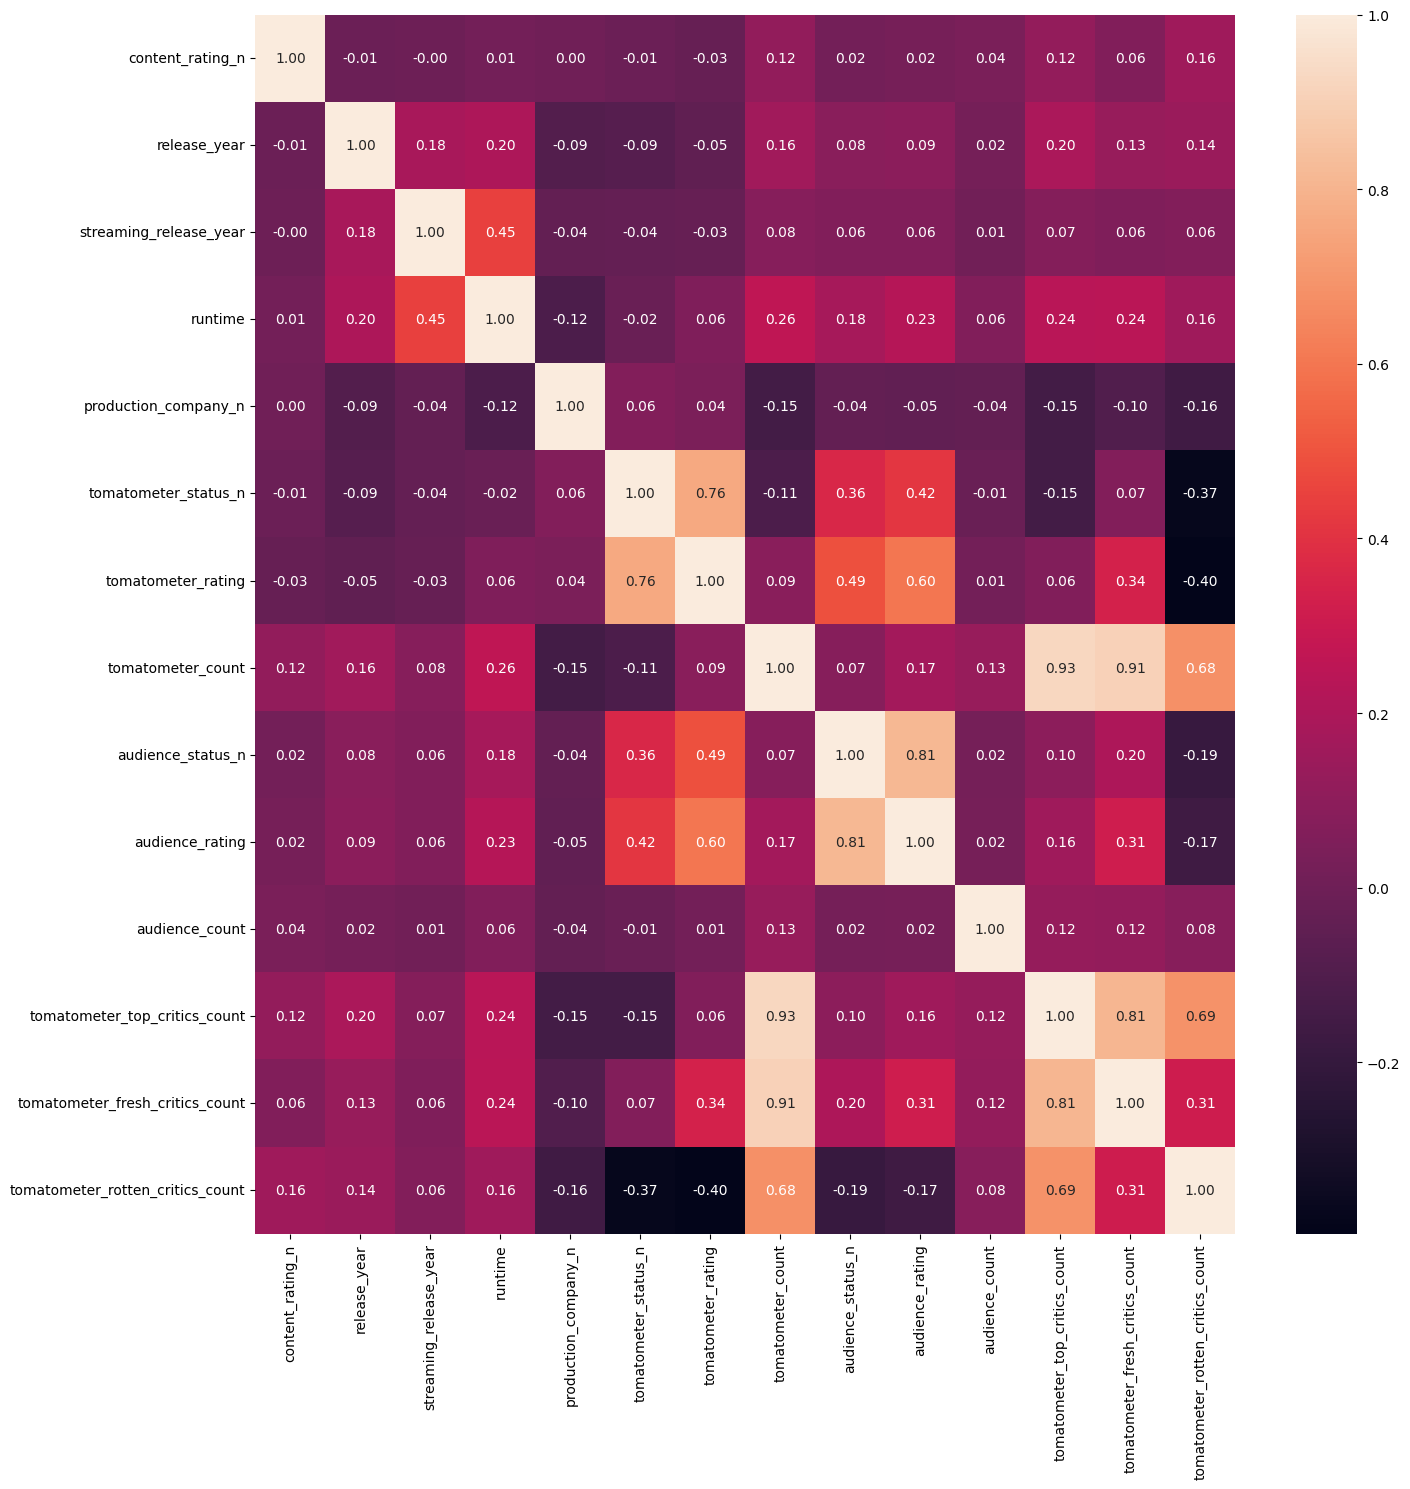

In [76]:
corr_matrix = movies_corr.corr()

fig, axis = plt.subplots(figsize = (15, 15))

sns.heatmap(corr_matrix, annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

# 6. Ingeniería de Características <a classs="anchor" id="caracteristicas"></a>

## 6.1. Preparar los Datos <a classs="anchor" id="preparar"></a>

Como primera etapa vamos a mapear las reseñas de frescas o podridas como boolean

In [24]:
c_df_copy['review_label'] = c_df_copy['review_type'].map({'Fresh': 1, 'Rotten': 0})

print(c_df_copy[['review_type', 'review_label']].head())
c_df_copy.drop(columns=['review_type'], inplace=True)

  review_type  review_label
0       Fresh             1
1       Fresh             1
2       Fresh             1
3       Fresh             1
4      Rotten             0


In [25]:
c_df_copy.head()

,rotten_tomatoes_link,top_critic,publisher_name,review_content,review_label
0,m/0814255,False,Urban Cinefile,A fantasy adventure that fuses Greek mythology...,1
1,m/0814255,False,Urban Cinefile,"Uma Thurman as Medusa, the gorgon with a coiff...",1
2,m/0814255,False,FILMINK (Australia),With a top-notch cast and dazzling special eff...,1
3,m/0814255,False,Sunday Mail (Australia),Whether audiences will get behind The Lightnin...,1
4,m/0814255,True,Hollywood Reporter,What's really lacking in The Lightning Thief i...,0


In [26]:
c_df_copy['top_critic_num'] = c_df_copy['top_critic'].astype(int)
c_df_copy.drop(columns=['top_critic'], inplace=True)

In [27]:
c_df_copy['review_len'] = c_df_copy['review_content'].str.len()

# cantidad de palabras
c_df_copy['review_word_count'] = c_df_copy['review_content'].str.split().apply(len)

In [28]:
c_df_copy.head()

,rotten_tomatoes_link,publisher_name,review_content,review_label,top_critic_num,review_len,review_word_count
0,m/0814255,Urban Cinefile,A fantasy adventure that fuses Greek mythology...,1,0,176,29
1,m/0814255,Urban Cinefile,"Uma Thurman as Medusa, the gorgon with a coiff...",1,0,153,25
2,m/0814255,FILMINK (Australia),With a top-notch cast and dazzling special eff...,1,0,121,20
3,m/0814255,Sunday Mail (Australia),Whether audiences will get behind The Lightnin...,1,0,213,37
4,m/0814255,Hollywood Reporter,What's really lacking in The Lightning Thief i...,0,1,147,26


## 6.2. Análisis de Outliers <a classs="anchor" id="outliers"></a>

In [77]:
movies_n.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,release_year,streaming_release_year,content_rating_n,production_company_n,tomatometer_status_n,audience_status_n
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000,17712.00000,17712.000000,17712.000000,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139,1867.94467,1971.908367,1.776140,461.671240,0.954325,0.504855
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435,496.24456,293.566478,1.236876,687.813605,0.906318,0.548252
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-1.000000,-1.000000,-1.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000,1987.00000,2015.000000,1.000000,29.000000,0.000000,0.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000,2005.00000,2016.000000,2.000000,144.000000,1.000000,1.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000,2013.00000,2017.000000,2.000000,559.000000,2.000000,1.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000,2020.00000,2020.000000,5.000000,3045.000000,2.000000,1.000000


- Todas las variables transformadas de variables categóricas tienen valores discretos, por lo que sus valores de dispersión son razonables.
- Para release_year y streaming_release_year, se tuvo que asignar 0 a las películas sin año. Por esto los valores pueden parecer muy dispersos. Pese a esto y, entendiendo la naturaleza de los datos, los valores tienen sentido.
- Las variables de rating estan dentro de los valores esperados para la escala dada (0 a 100).
- Las variables de tomatometer_count también parecen tener sentido, siendo las películas más populares las que tienen un count más alto.
- La variable audience_count es la que tiene valores más extremos. Sin embargo, si consideramos que se trata de películas disponibles mundialmente, no es extraño pensar que haya películas con tantas valoraciones.

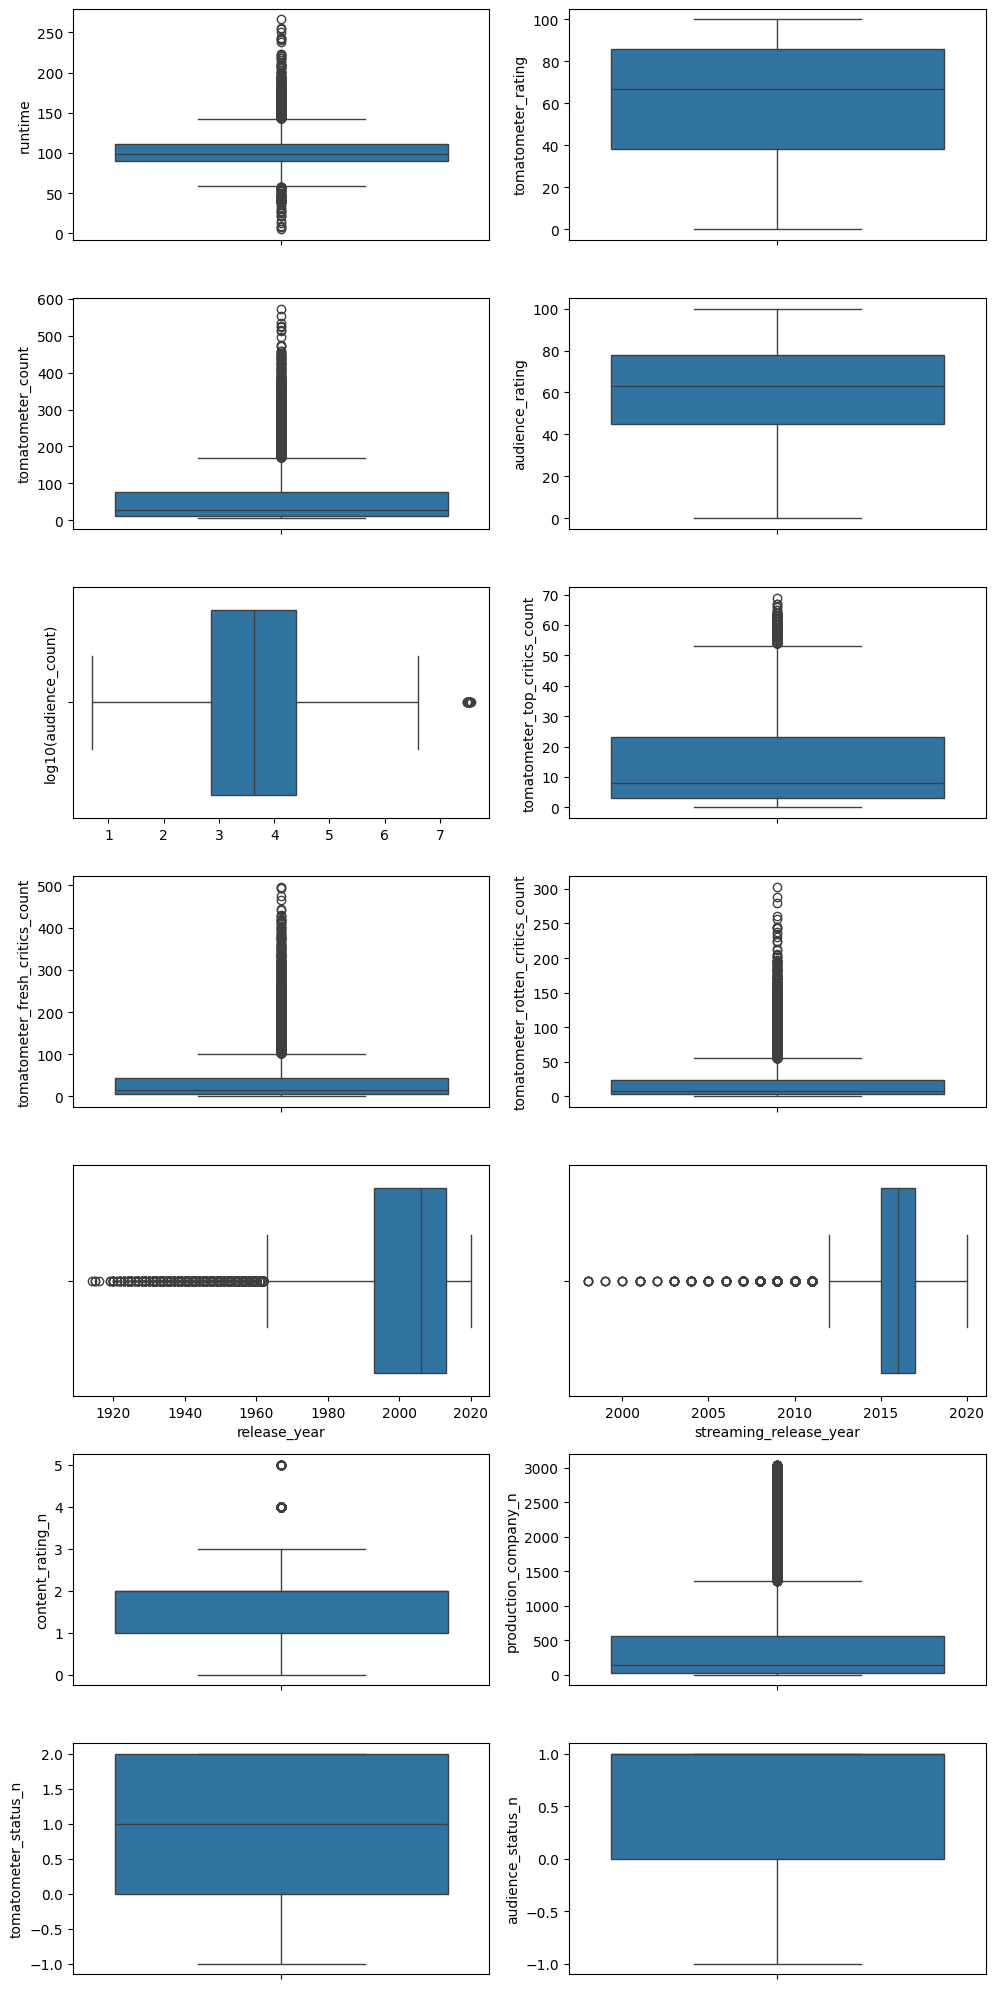

In [50]:
fig, axis = plt.subplots(7, 2, figsize = (10, 20))

data_log = np.log10(movies_n["audience_count"][movies_n["audience_count"] > 0])

sns.boxplot(ax = axis[0, 0], data = movies_n, y = "runtime")
sns.boxplot(ax = axis[0, 1], data = movies_n, y = "tomatometer_rating")
sns.boxplot(ax = axis[1, 0], data = movies_n, y = "tomatometer_count")
sns.boxplot(ax = axis[1, 1], data = movies_n, y = "audience_rating")

#sns.boxplot(ax = axis[2, 0], data = movies_n, y = "audience_count")
sns.boxplot(x=data_log, ax=axis[2, 0])
axis[2, 0].set_ylabel("log10(audience_count)")
axis[2, 0].set_xlabel("")

sns.boxplot(ax = axis[2, 1], data = movies_n, y = "tomatometer_top_critics_count")
sns.boxplot(ax = axis[3, 0], data = movies_n, y = "tomatometer_fresh_critics_count")
sns.boxplot(ax = axis[3, 1], data = movies_n, y = "tomatometer_rotten_critics_count")
sns.boxplot(ax = axis[4, 0], data = movies_n[movies_n["release_year"] > 0], x = "release_year")
sns.boxplot(ax = axis[4, 1], data = movies_n[movies_n["streaming_release_year"] > 0], x = "streaming_release_year")
sns.boxplot(ax = axis[5, 0], data = movies_n, y = "content_rating_n")
sns.boxplot(ax = axis[5, 1], data = movies_n, y = "production_company_n")
sns.boxplot(ax = axis[6, 0], data = movies_n, y = "tomatometer_status_n")
sns.boxplot(ax = axis[6, 1], data = movies_n, y = "audience_status_n")

plt.tight_layout()

plt.show()

Tenemos varias variables sin valores atípicos:
- Tomatometer Rating
- Audience Rating
- Tomatometer Status
- Audience Status

Estos valores tienen sentido porque las variables están en una escala definida (0 - 100) o son una conversión de una variable categórica de baja cardinalidad.

El resto de las variables tienen que son considerados atípicos pero, entendiendo el contexto de los datos, tienen sentido. Sin embargo, algunos valores atípicos pueden ser error de tipeo:

- Para algunas películas, el runtime es muy pequeño y esto podría deberse a un error en los datos.
- Los diversos tomatometer counts tienen valores atípicos en la cota superior y esto puede deberse a las visualizaciones de películas muy populares vs otras que no lo son.
- Los outliers en año de lanzamiento también pueden estar relacionados con errores de tipeo, aunque es posible que el dataset contenga películas muy antiguas.
- Los outliers en año de lanzamiento de streaming pueden estar relacionados con la popularidad de los servicios de streaming en el tiempo.
- Los outliers en production company pueden estar relacionados a pocas compañías que han producido un mayor volumen de películas vs productoras nuevas o independientes. 

En cualquier caso, no se hará ningún tratamiento de outliers y trabajaremos con los datos como vienen del origen.

En el dataset de críticas, sólo se tendrán en cuenta que las reseñas con una longitud mínima de 10 caracteres y un máximo de 5000 caracteres.

In [29]:
c_df_copy = c_df_copy[(c_df_copy['review_len'] >= 10) & (c_df_copy['review_len'] <= 5000)]

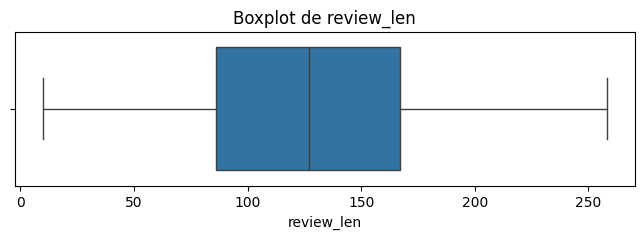

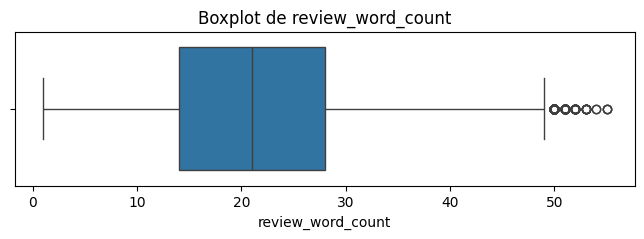

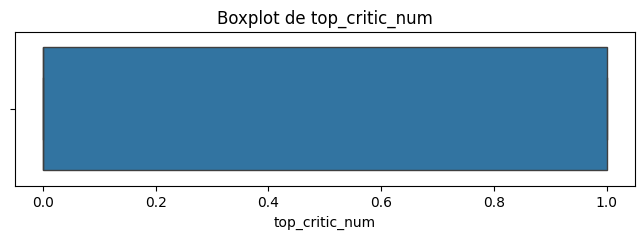

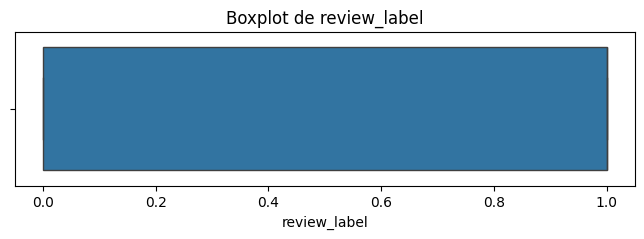

In [30]:
num_cols = ['review_len', 'review_word_count', 'top_critic_num', 'review_label']

for col in num_cols:
    plt.figure(figsize=(8,2))
    sns.boxplot(x=c_df_copy[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

Sólo se ven datos atípicos en la columna *review_word_count* pero, por la naturaleza del análisis que haremos y el sistema recomendador, no los vamos a eliminar.

# 7. Guardar los Datasets <a classs="anchor" id="guardar"></a>

In [78]:
movies['release_year'] = movies['release_year'].replace(0, pd.NA)

In [ ]:
movies.to_csv("../data/processed/movies.csv", index=False)
critics.to_csv("../data/processed/critics.csv", index=False)
c_df_copy.to_csv("../data/processed/c_df_copy.csv", index=False)